# **SUPERSTORE DISCOUNT ANALYSIS AND PREDICTIONS**

### **Project Overview**

In today's fiercely competitive retail environment, understanding customer behavior and sales patterns is crucial for success. This project focuses on a leading Superstore seeking to optimize its discount strategies by uncovering which products, regions, and customer segments drive discount decisions.

Beyond analysis, we aim to develop a predictive model that accurately forecasts the discount offered on each order. Such insights empower the business to tailor promotions more effectively, maximize profitability, and sharpen competitive advantage.

### **Dataset Highlights**

The dataset contains detailed transactional records, capturing customer demographics, product information, sales performance, and financial metrics including discounts and profits. Key features include:

- Customer and order identifiers
- Geographic data: city, state, and region
- Product categories and subcategories
- Sales, quantity, discount, and profit figures

### **Goals of the Superstore Dataset Analysis**
The project should aim to:

📊 Analyze sales performance: Understand trends in sales, profit, and quantity.

🛍️ Identify best/worst-performing categories and sub-categories.

🗺️ Uncover regional performance by state/region/segment.

💸 Find factors affecting profit (e.g., high sales but low profit).

📦 Optimize shipping and order handling insights.

🧠 Build predictive models (e.g., predict sales or profit).

### **Libraries & Tools Used**

In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

### **Dataset Overview**

In [2]:
df = pd.read_excel("Sample - Superstore.xlsx")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### **Exploratory Data Analysis (EDA)**

In [6]:
# count misiing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
# find and remove duplicates if any
print('Duplicate rows:', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [8]:
# convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### **Univariate Analysis – Numerical Features**
We'll analyze these key numerical columns:

- Shipment
- Sales
- Profit
- Discount
- Quantity

In [9]:
# Extract useful features from Order Date
df['Year'] = df['Ship Date'].dt.year
df['Month'] = df['Ship Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()

In [10]:
monthly_data = df.groupby(['Year', 'Month']).size().reset_index(name = 'Shipments')

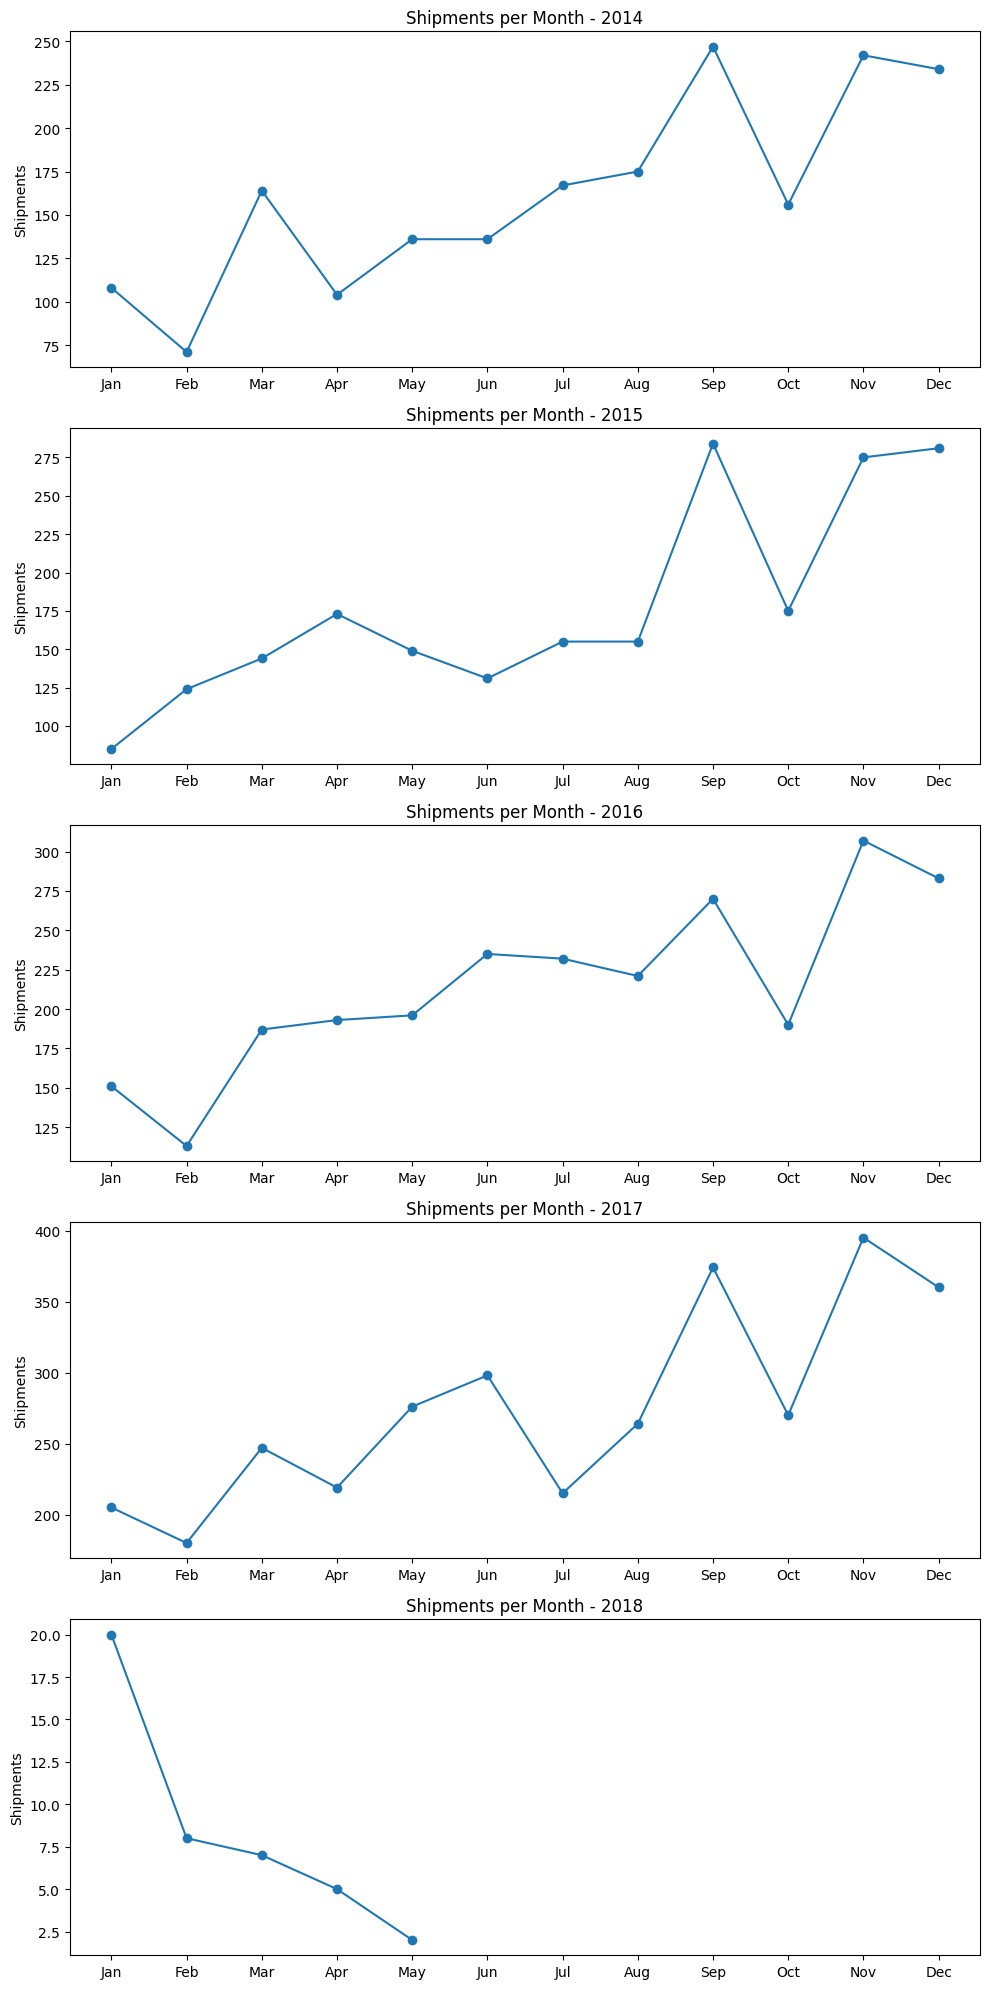

In [11]:
# linechart for shipments for each month from year 2014 - 2018
years = sorted(monthly_data['Year'].unique())
n_years = len(years)

fig, axes = plt.subplots(nrows = n_years, ncols = 1, figsize = (10,4 * n_years), sharex = True)

# Make sure axes is always an array (even if 1 plot)
if n_years == 1:
    axes = [axes]

# Plot each year separately
for i, year in enumerate(years):
    data = monthly_data[monthly_data['Year'] == year]
    axes[i].plot(data['Month'], data['Shipments'], marker='o')
    axes[i].set_title(f'Shipments per Month - {year}')
    axes[i].set_ylabel('Shipments')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)


plt.tight_layout()
plt.show()

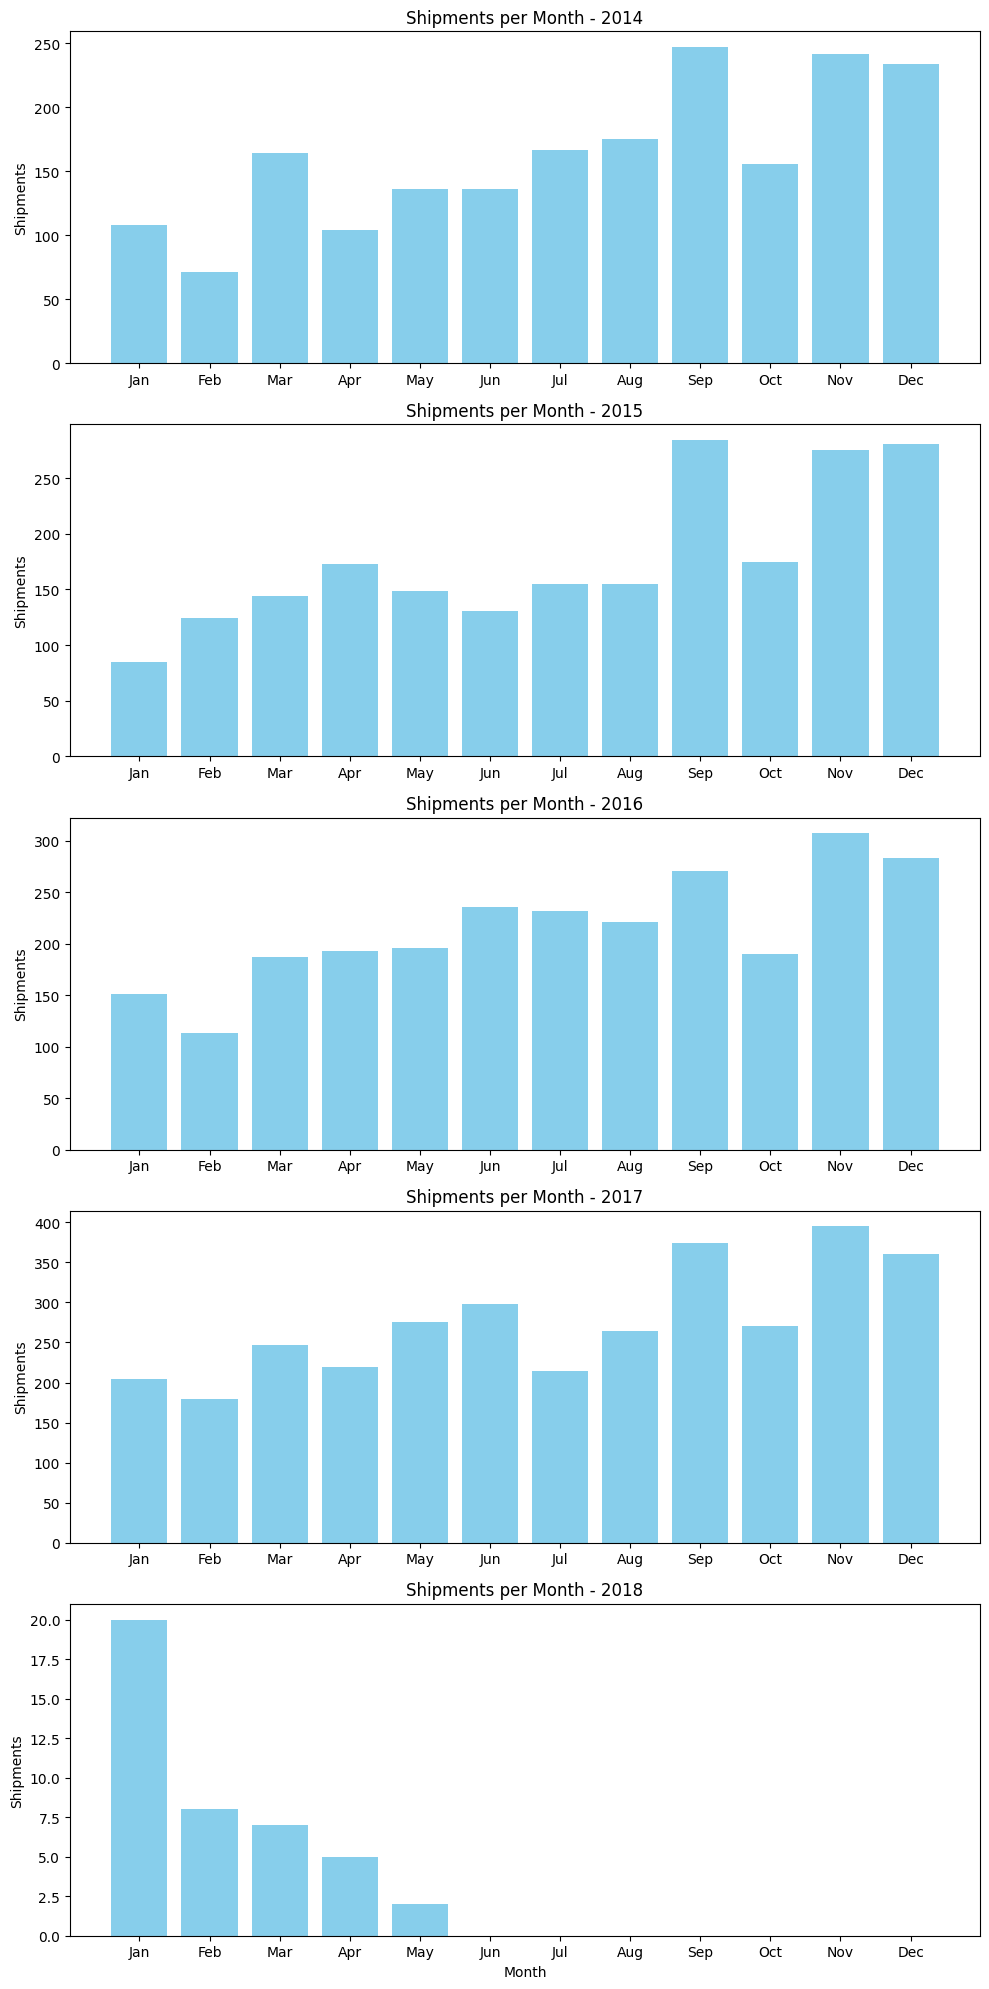

In [12]:
# bar chart for shipments for each month from year 2014 - 2018
fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(10, 4 * n_years), sharex=True)

if n_years == 1:
    axes = [axes]

for i, year in enumerate(years):
    data = monthly_data[monthly_data['Year'] == year]
    axes[i].bar(data['Month'], data['Shipments'], color='skyblue')
    axes[i].set_title(f'Shipments per Month - {year}')
    axes[i].set_ylabel('Shipments')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)

axes[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

In [13]:
monthly_data_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
monthly_data_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_data_discount = df.groupby(['Year', 'Month'])['Discount'].sum().reset_index()
monthly_data_quantity = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

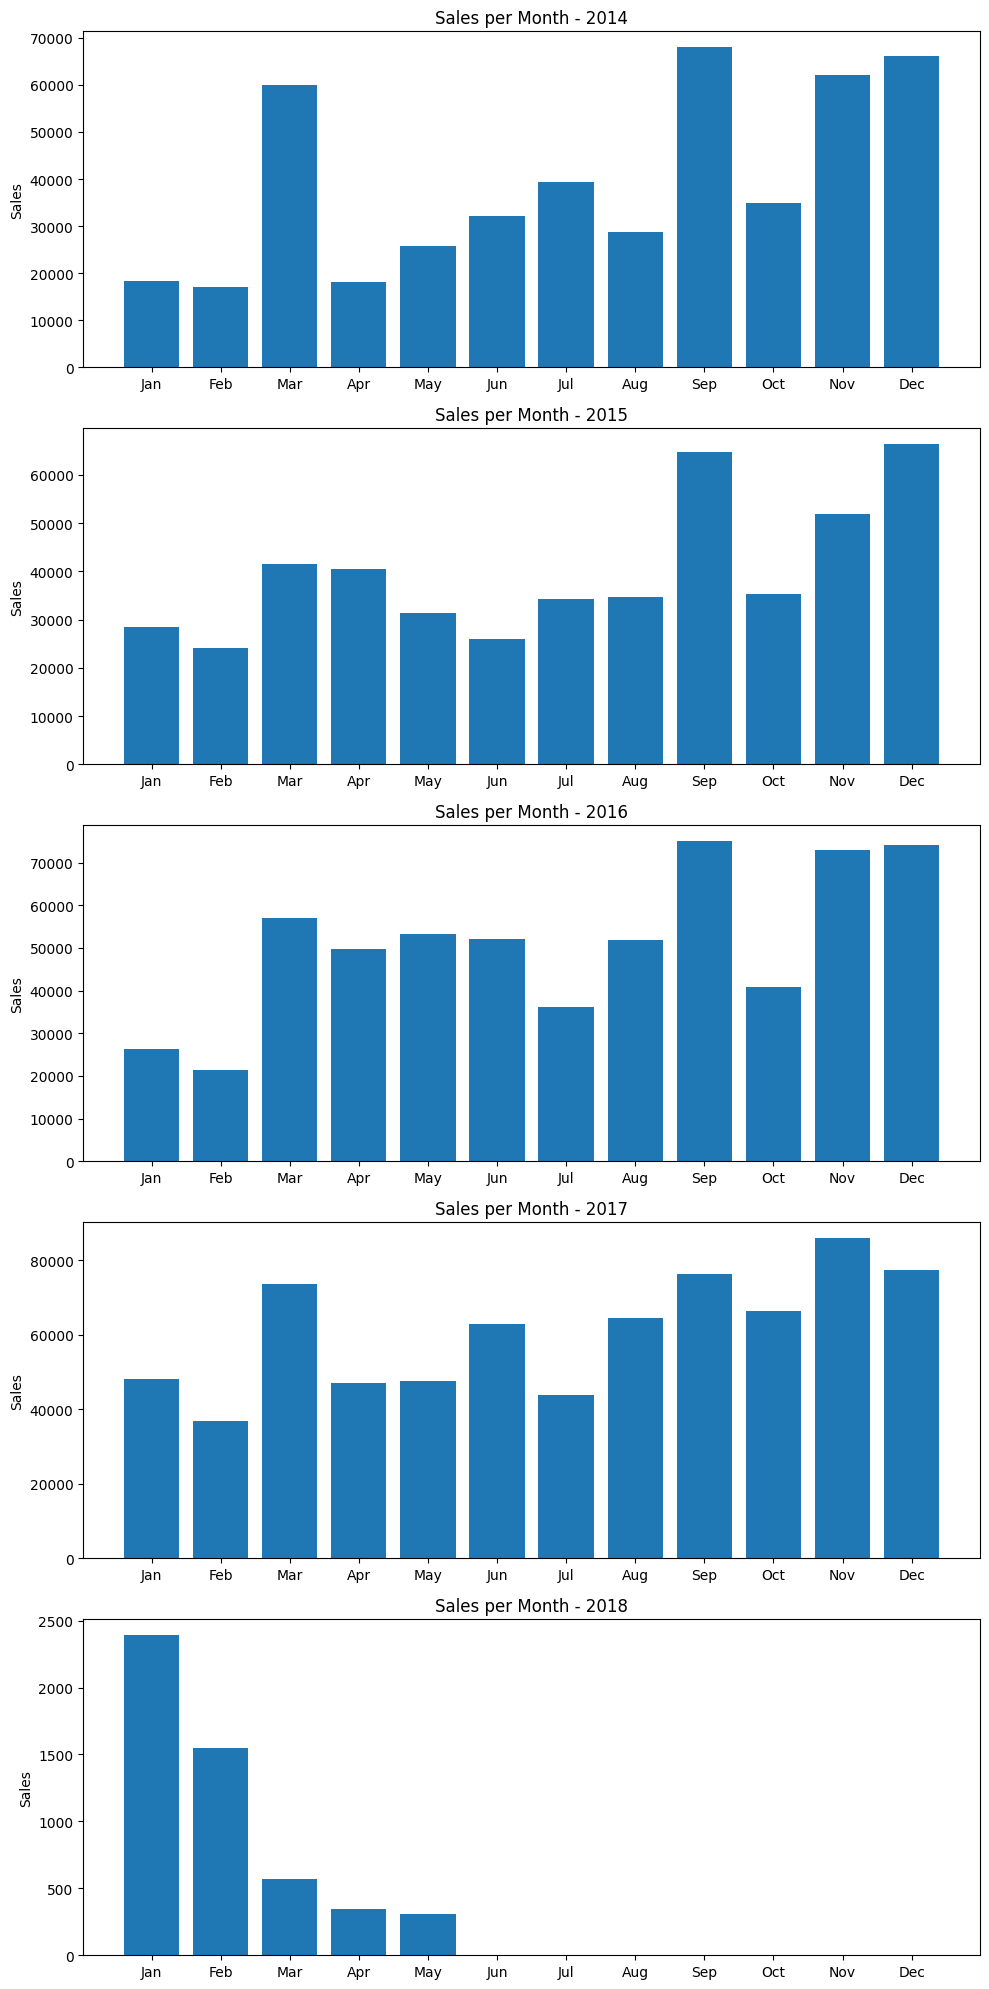

In [14]:
# bar chart for sales for each month for year 2014 - 2018
years = sorted(monthly_data_sales['Year'].unique())
n_years = len(years)

fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(10, 4 * n_years), sharex=True)

# Make sure axes is always an array (even if 1 plot)
if n_years == 1:
    axes = [axes]

# Plot each year separately
for i, year in enumerate(years):
    data = monthly_data_sales[monthly_data_sales['Year'] == year]
    axes[i].bar(data['Month'], data['Sales'])
    axes[i].set_title(f'Sales per Month - {year}')
    axes[i].set_ylabel('Sales')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

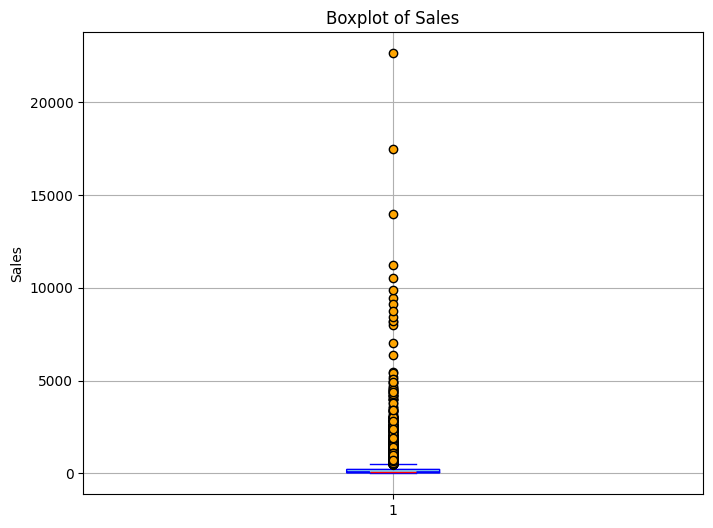

In [15]:
# Boxplot for Sales
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'], patch_artist=True, notch=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=6))

plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

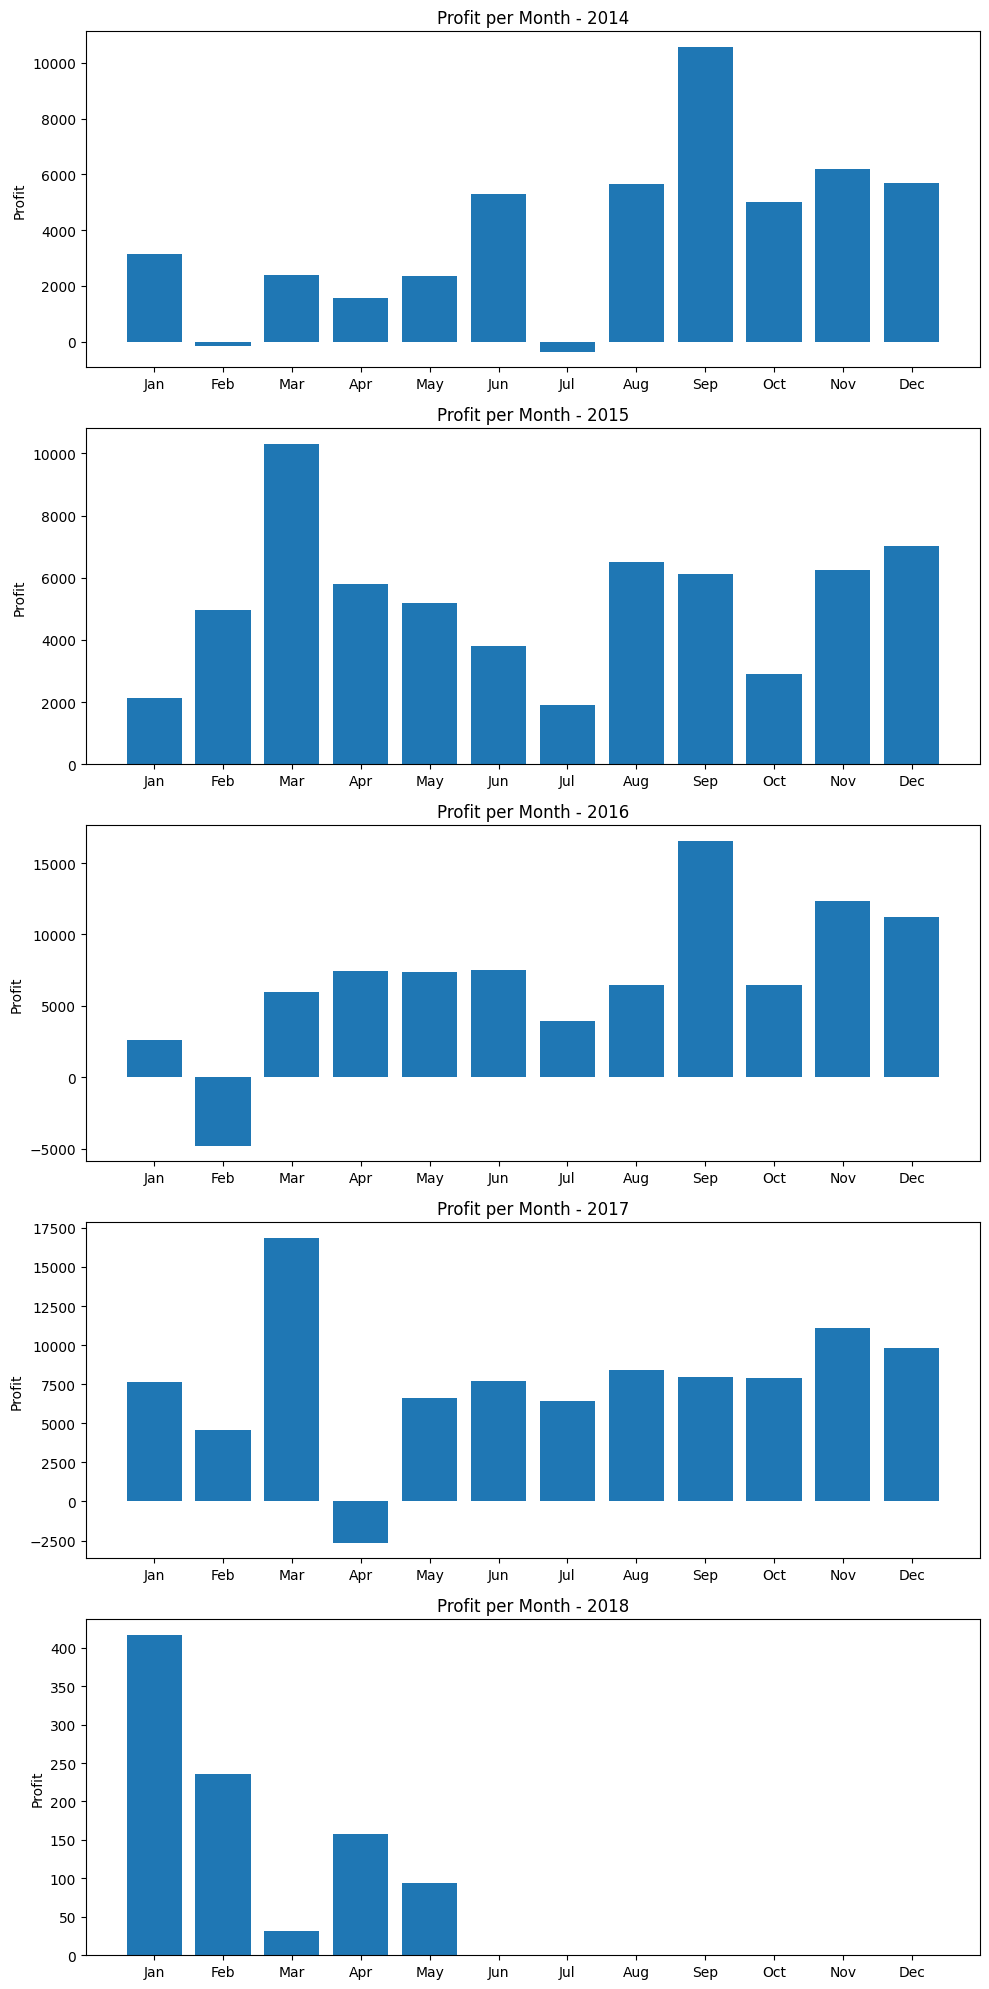

In [16]:
# Bar chart for profit for each month for year 2014 - 2018
years = sorted(monthly_data_profit['Year'].unique())
n_years = len(years)

fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(10, 4 * n_years), sharex=True)

# Make sure axes is always an array (even if 1 plot)
if n_years == 1:
    axes = [axes]

# Plot each year separately
for i, year in enumerate(years):
    data = monthly_data_profit[monthly_data_profit['Year'] == year]
    axes[i].bar(data['Month'], data['Profit'])
    axes[i].set_title(f'Profit per Month - {year}')
    axes[i].set_ylabel('Profit')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

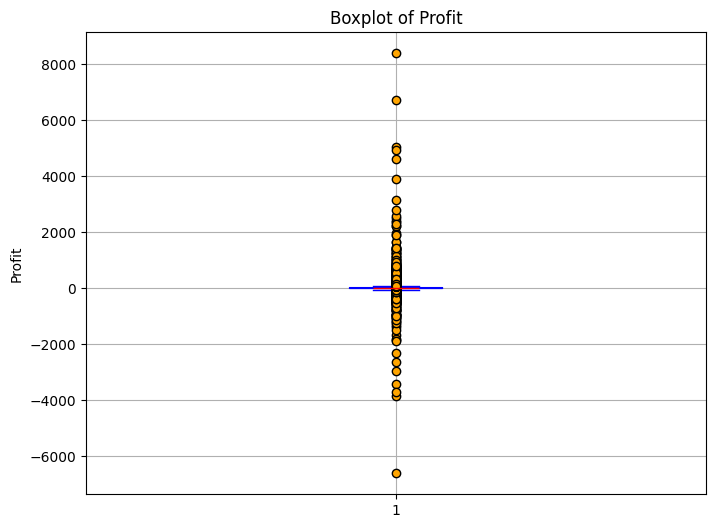

In [17]:
# Boxplot for Profit
plt.figure(figsize=(8, 6))
plt.boxplot(df['Profit'], patch_artist=True, notch=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=6))

plt.title('Boxplot of Profit')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

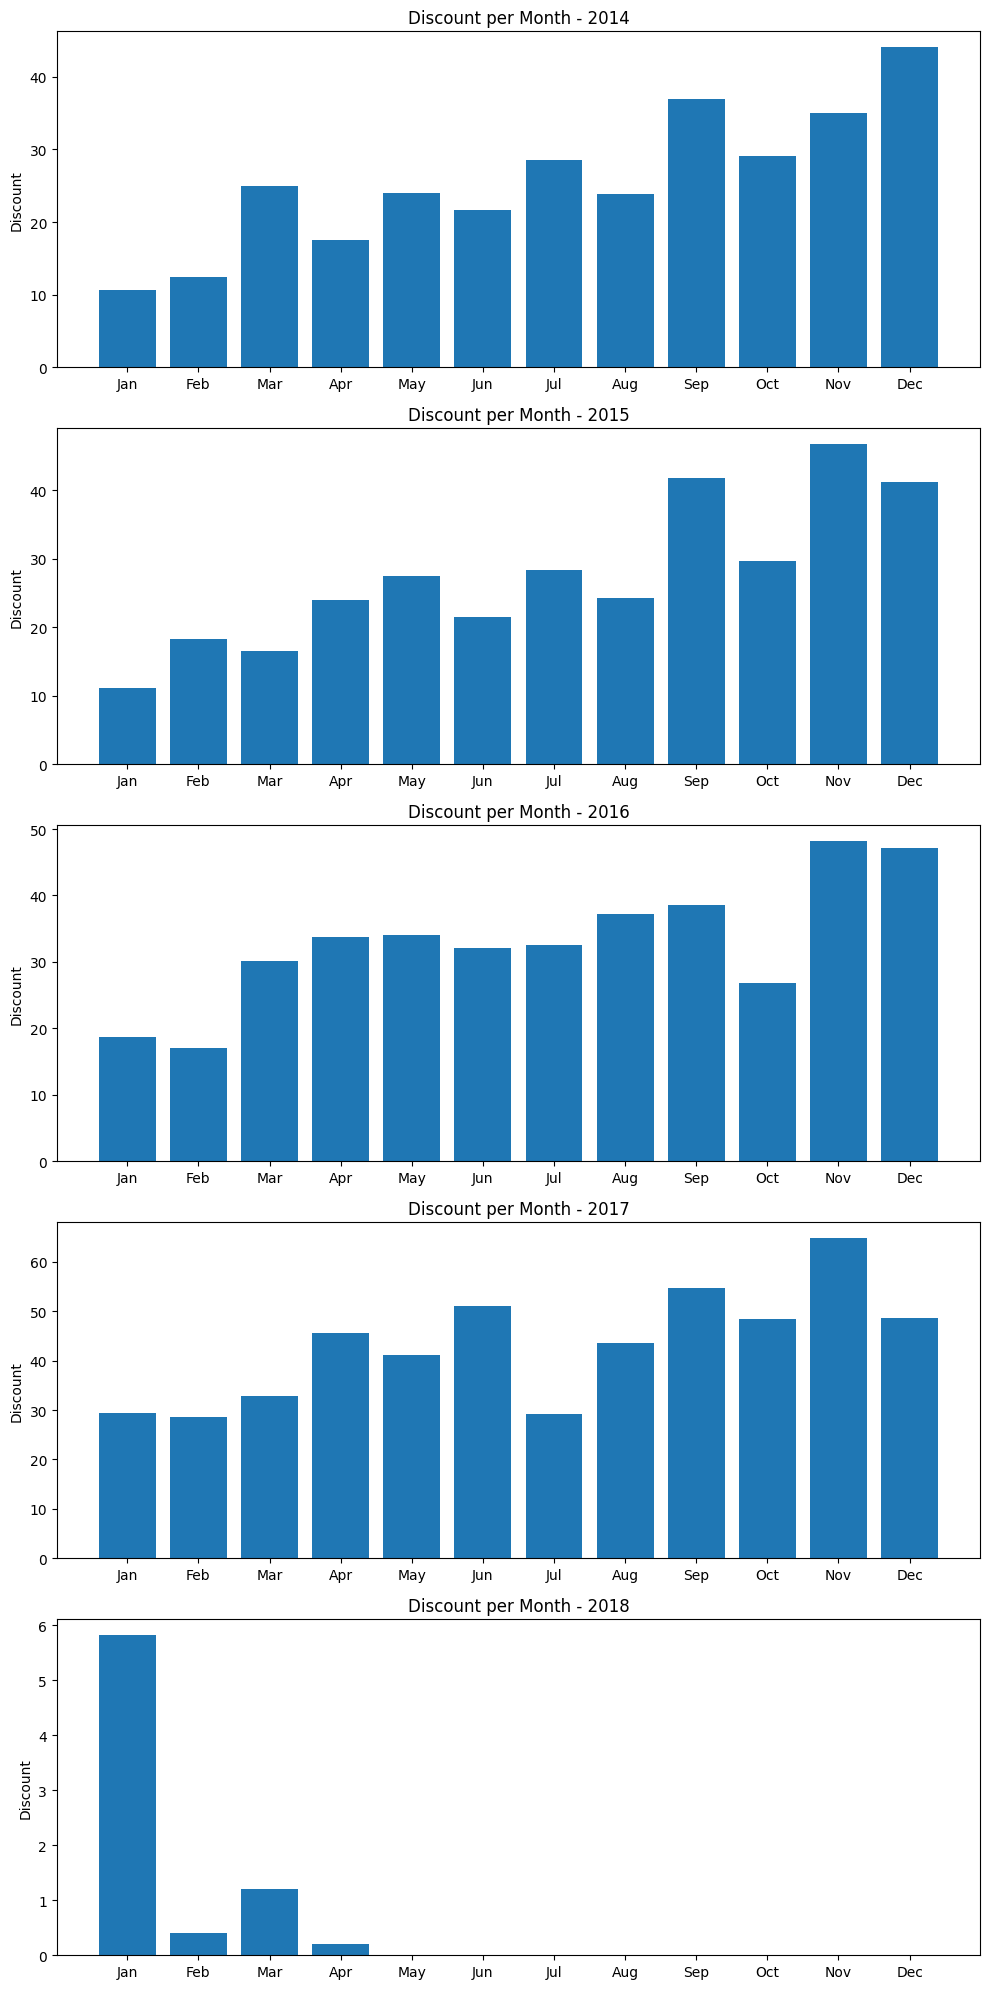

In [18]:
# Bar chart for Discount per Month for year 2014 - 2018
years = sorted(monthly_data_discount['Year'].unique())
n_years = len(years)

fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(10, 4 * n_years), sharex=True)

# Make sure axes is always an array (even if 1 plot)
if n_years == 1:
    axes = [axes]

# Plot each year separately
for i, year in enumerate(years):
    data = monthly_data_discount[monthly_data_discount['Year'] == year]
    axes[i].bar(data['Month'], data['Discount'])
    axes[i].set_title(f'Discount per Month - {year}')
    axes[i].set_ylabel('Discount')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

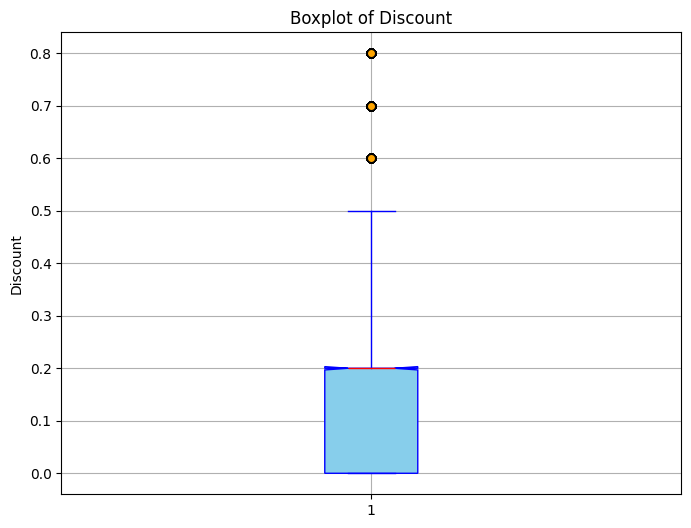

In [19]:
# Boxplot for Discount
plt.figure(figsize=(8, 6))
plt.boxplot(df['Discount'], patch_artist=True, notch=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=6))

plt.title('Boxplot of Discount')
plt.ylabel('Discount')
plt.grid(True)
plt.show()

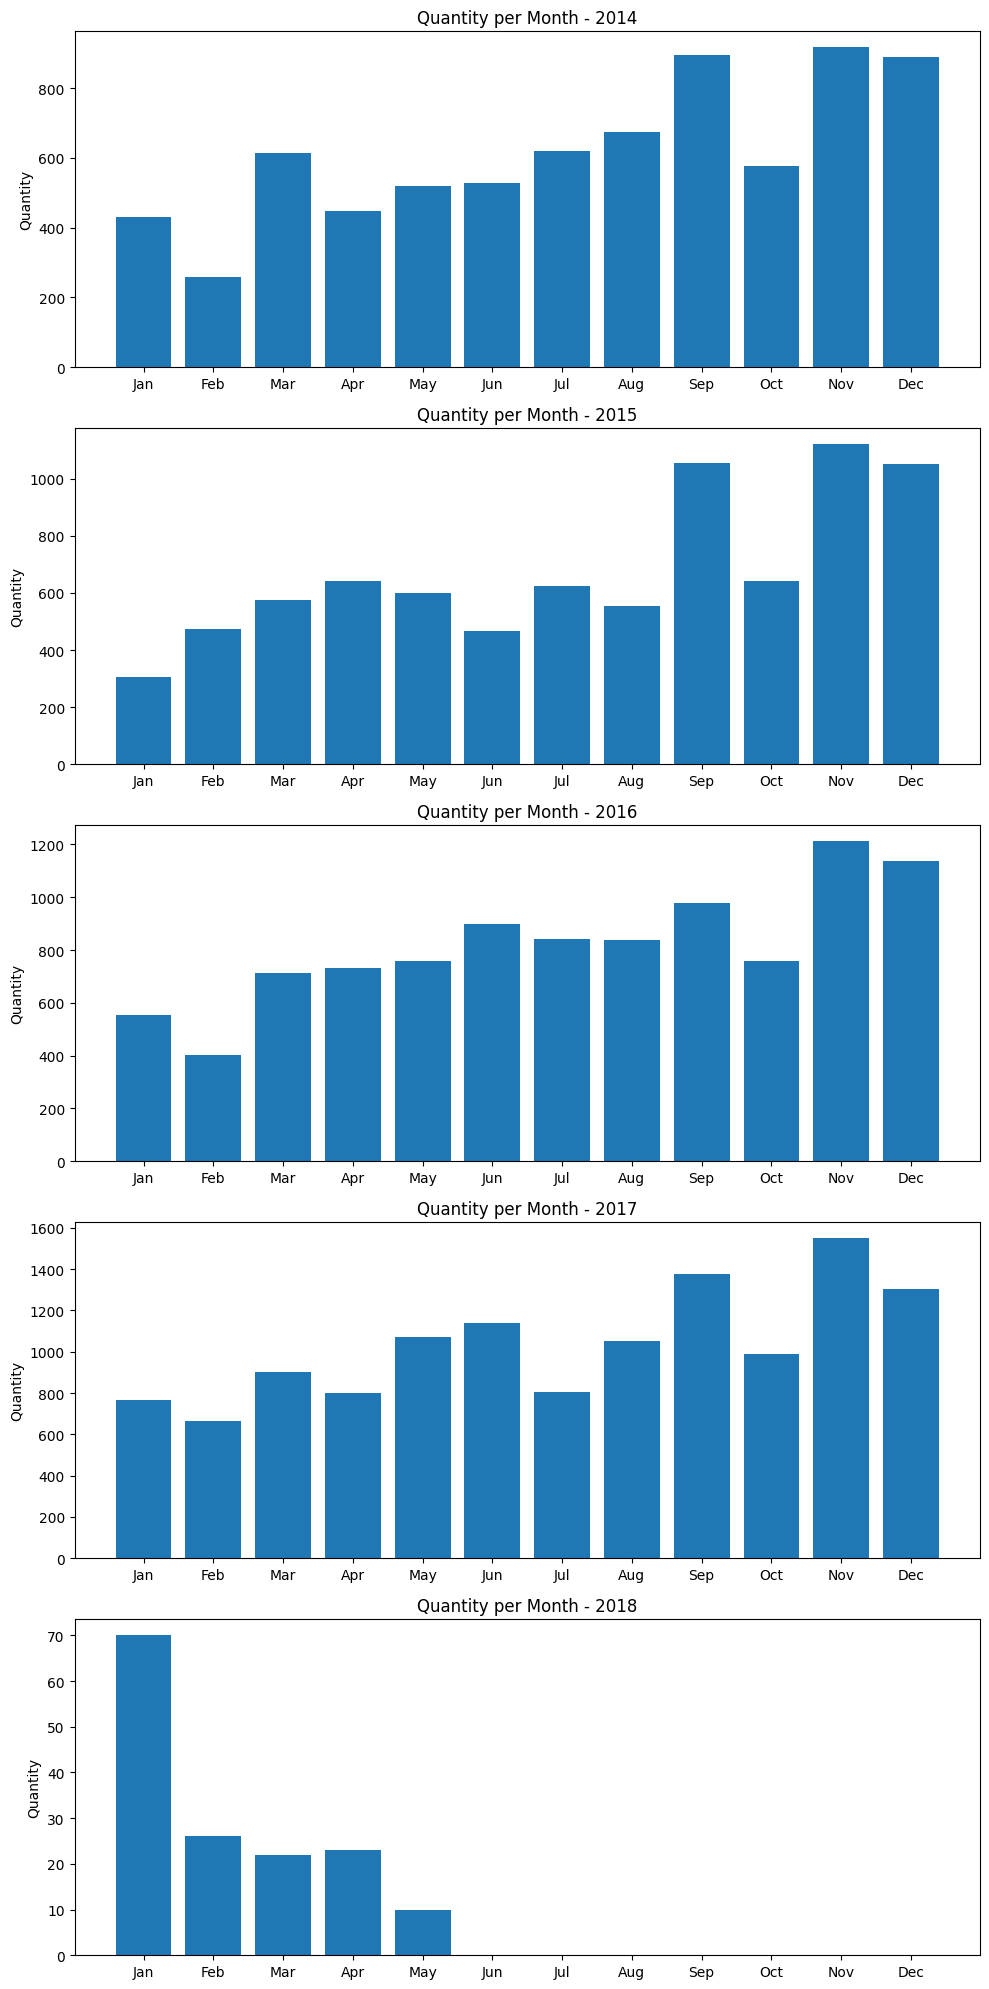

In [20]:
# Bar chart for Quantity for each month for year 2014 - 2018
years = sorted(monthly_data_quantity['Year'].unique())
n_years = len(years)

fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(10, 4 * n_years), sharex=True)

# Make sure axes is always an array (even if 1 plot)
if n_years == 1:
    axes = [axes]

# Plot each year separately
for i, year in enumerate(years):
    data = monthly_data_quantity[monthly_data_quantity['Year'] == year]
    axes[i].bar(data['Month'], data['Quantity'])
    axes[i].set_title(f'Quantity per Month - {year}')
    axes[i].set_ylabel('Quantity')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

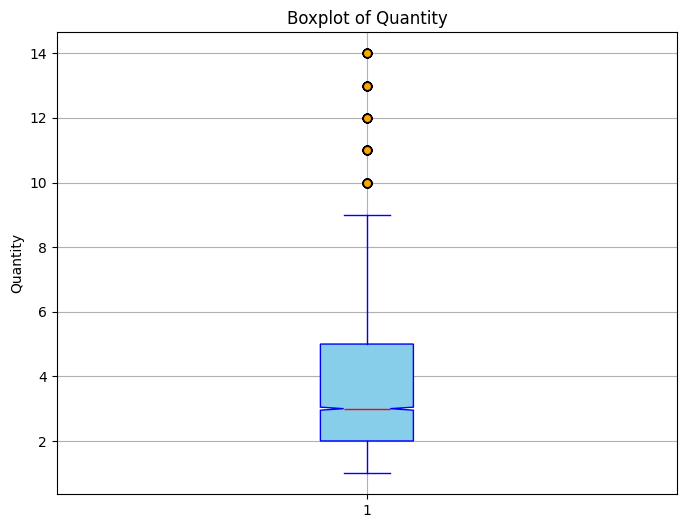

In [21]:
# Boxplot for Quantity
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'], patch_artist=True, notch=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=6))

plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

### **Univariate Analysis – Categorical Features**
We’ll analyze these commonly used categorical columns:

- Ship Mode
- Segment
- Category
- Sub-Category
- Region
- State
- City

In [22]:
# Set a consistent style
sns.set(style="whitegrid")

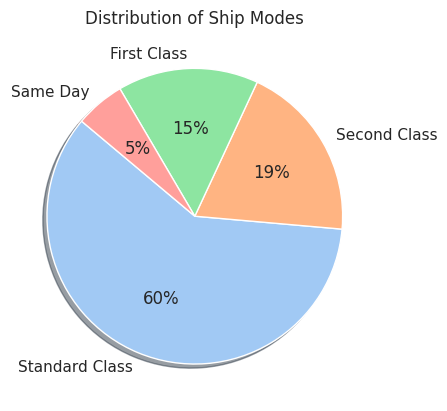

/tmp/ipython-input-23-3317036170.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=df, palette=colors, order=df['Ship Mode'].value_counts().index)


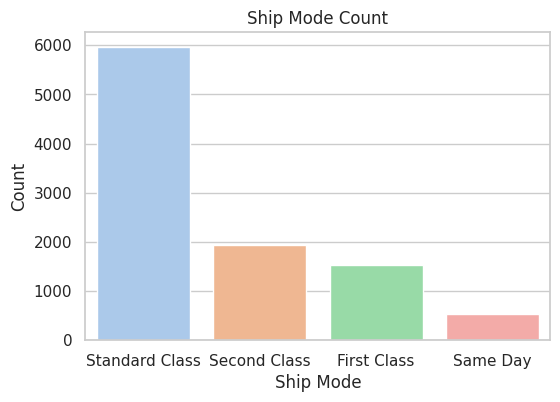

In [23]:
# 1. Ship Mode Distribution (Pie + Count Plot)
# piechart
colors = sns.color_palette('pastel')[0:4] # custom color palette
plt.pie(
    df['Ship Mode'].value_counts(),
    labels=df['Ship Mode'].value_counts().index,
    autopct='%.0f%%',
    startangle=140,
    colors=colors,
    shadow=True
)
plt.title('Distribution of Ship Modes')
plt.show()

# count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Ship Mode', data=df, palette=colors, order=df['Ship Mode'].value_counts().index)
plt.title('Ship Mode Count')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-24-1584489842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=df, palette='Set2')


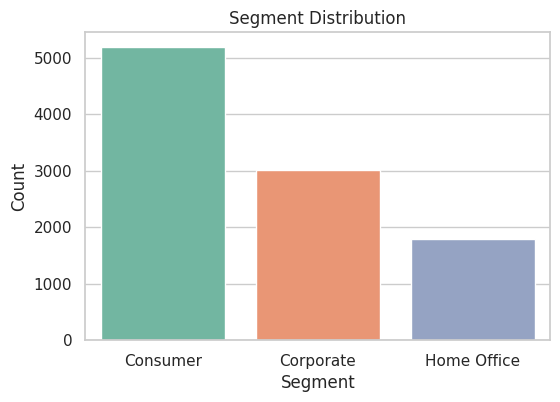

In [24]:
# 2. Segment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Segment', data=df, palette='Set2')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-25-2203160059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set3')


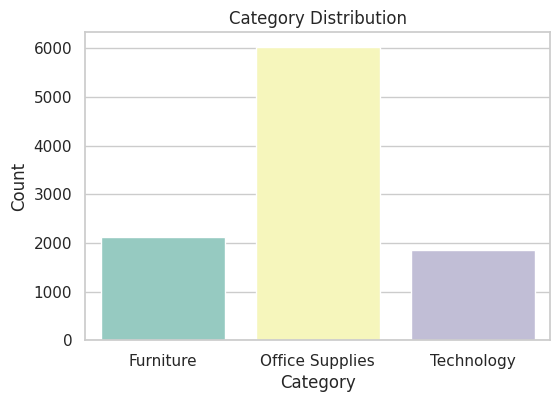

In [25]:
# 3. Category Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df, palette='Set3')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-26-3956869483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sub-Category', data=df, palette='muted', order=df['Sub-Category'].value_counts().index)


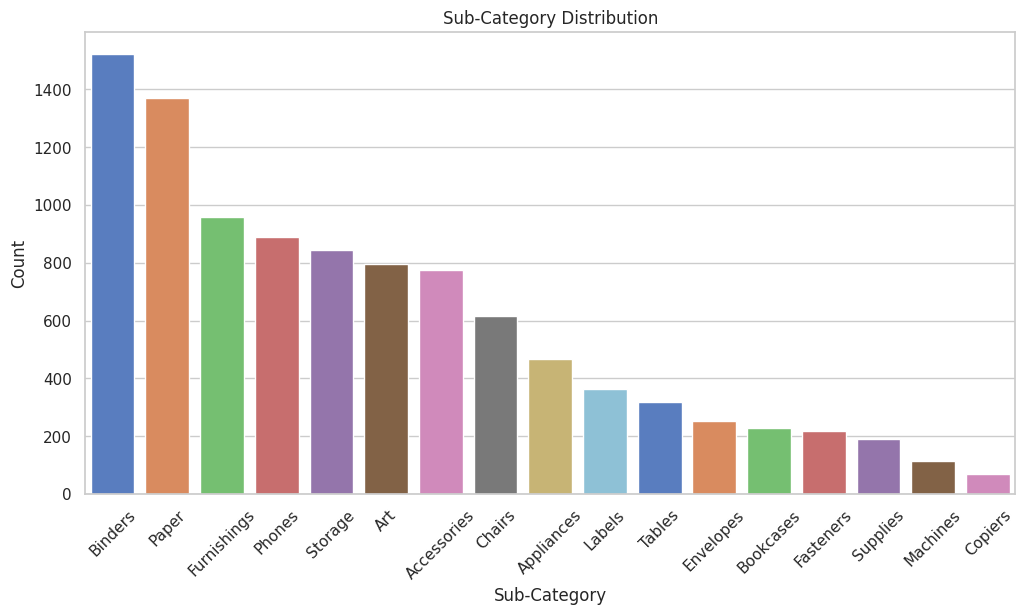

In [26]:
# 4. Sub-Category Distribution (Sorted)
plt.figure(figsize=(12, 6))
sns.countplot(x='Sub-Category', data=df, palette='muted', order=df['Sub-Category'].value_counts().index)
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

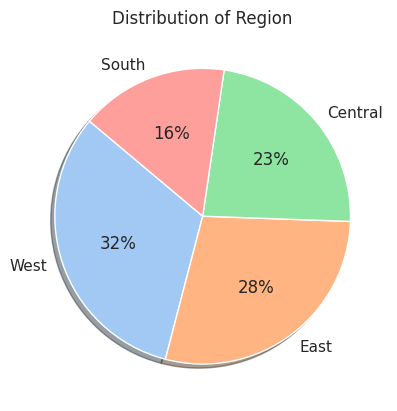

/tmp/ipython-input-27-3712261488.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='Set1')


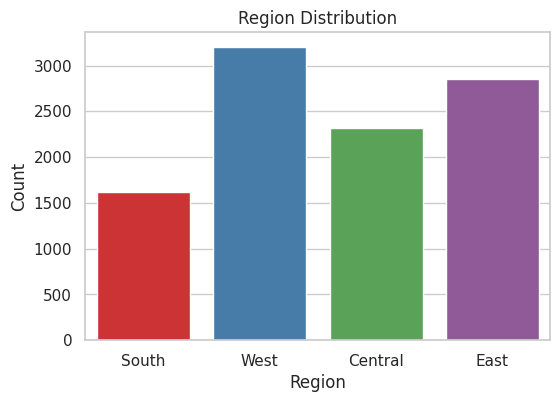

In [27]:
# 5. Region Distribution (Pie + Countplot)
# pie-chart
plt.pie(
    df['Region'].value_counts(),
    labels=df['Region'].value_counts().index,
    autopct='%.0f%%',
    startangle=140,
    colors=colors,
    shadow=True
)
plt.title('Distribution of Region')
plt.show()

#count-plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Region', data=df, palette='Set1')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

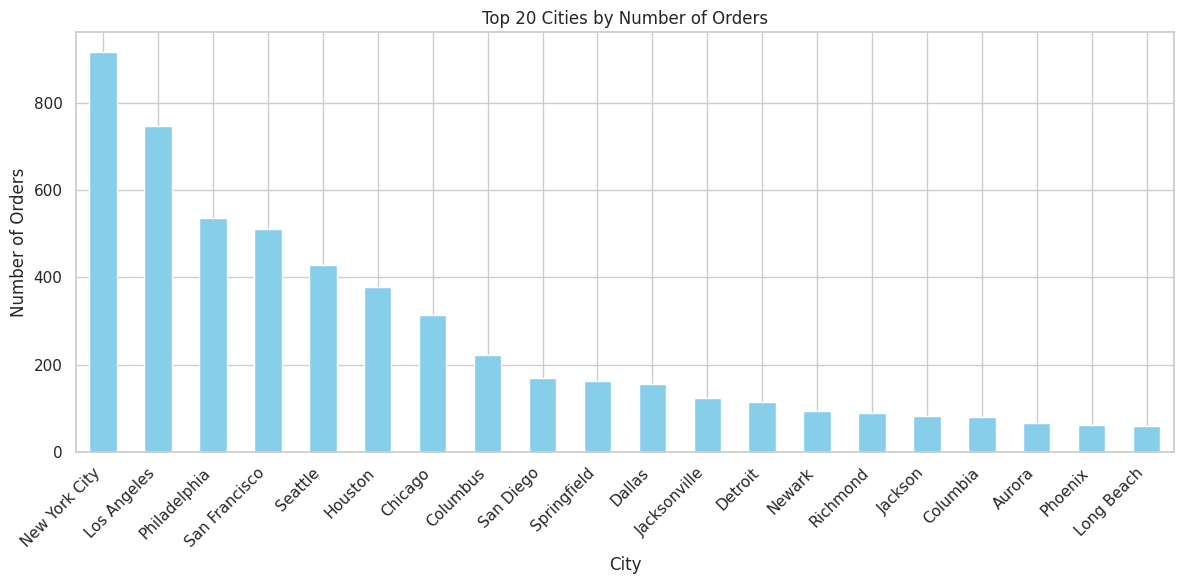

In [28]:
# Get top 20 cities by count
top_cities = df['City'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Top 20 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.show()

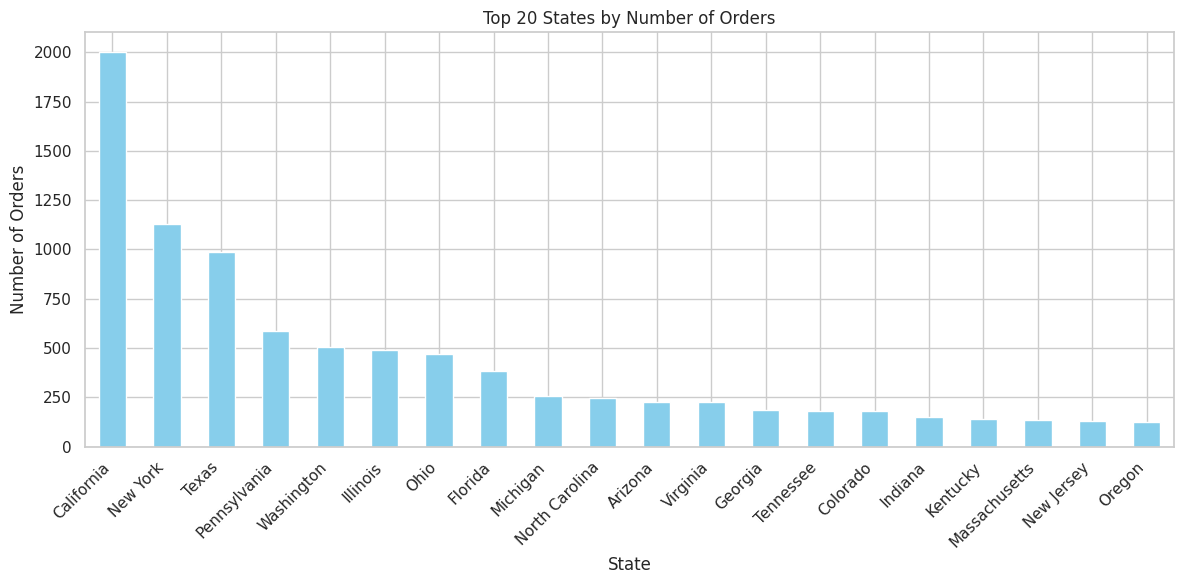

In [29]:
# Get top 20 states by count
top_states = df['State'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Top 20 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.show()

### **Bivariate Analysis**
1st Category - Numerical VS Numerical

- Sales vs Profit
- Discount vs Profit
- Quantity vs Profit

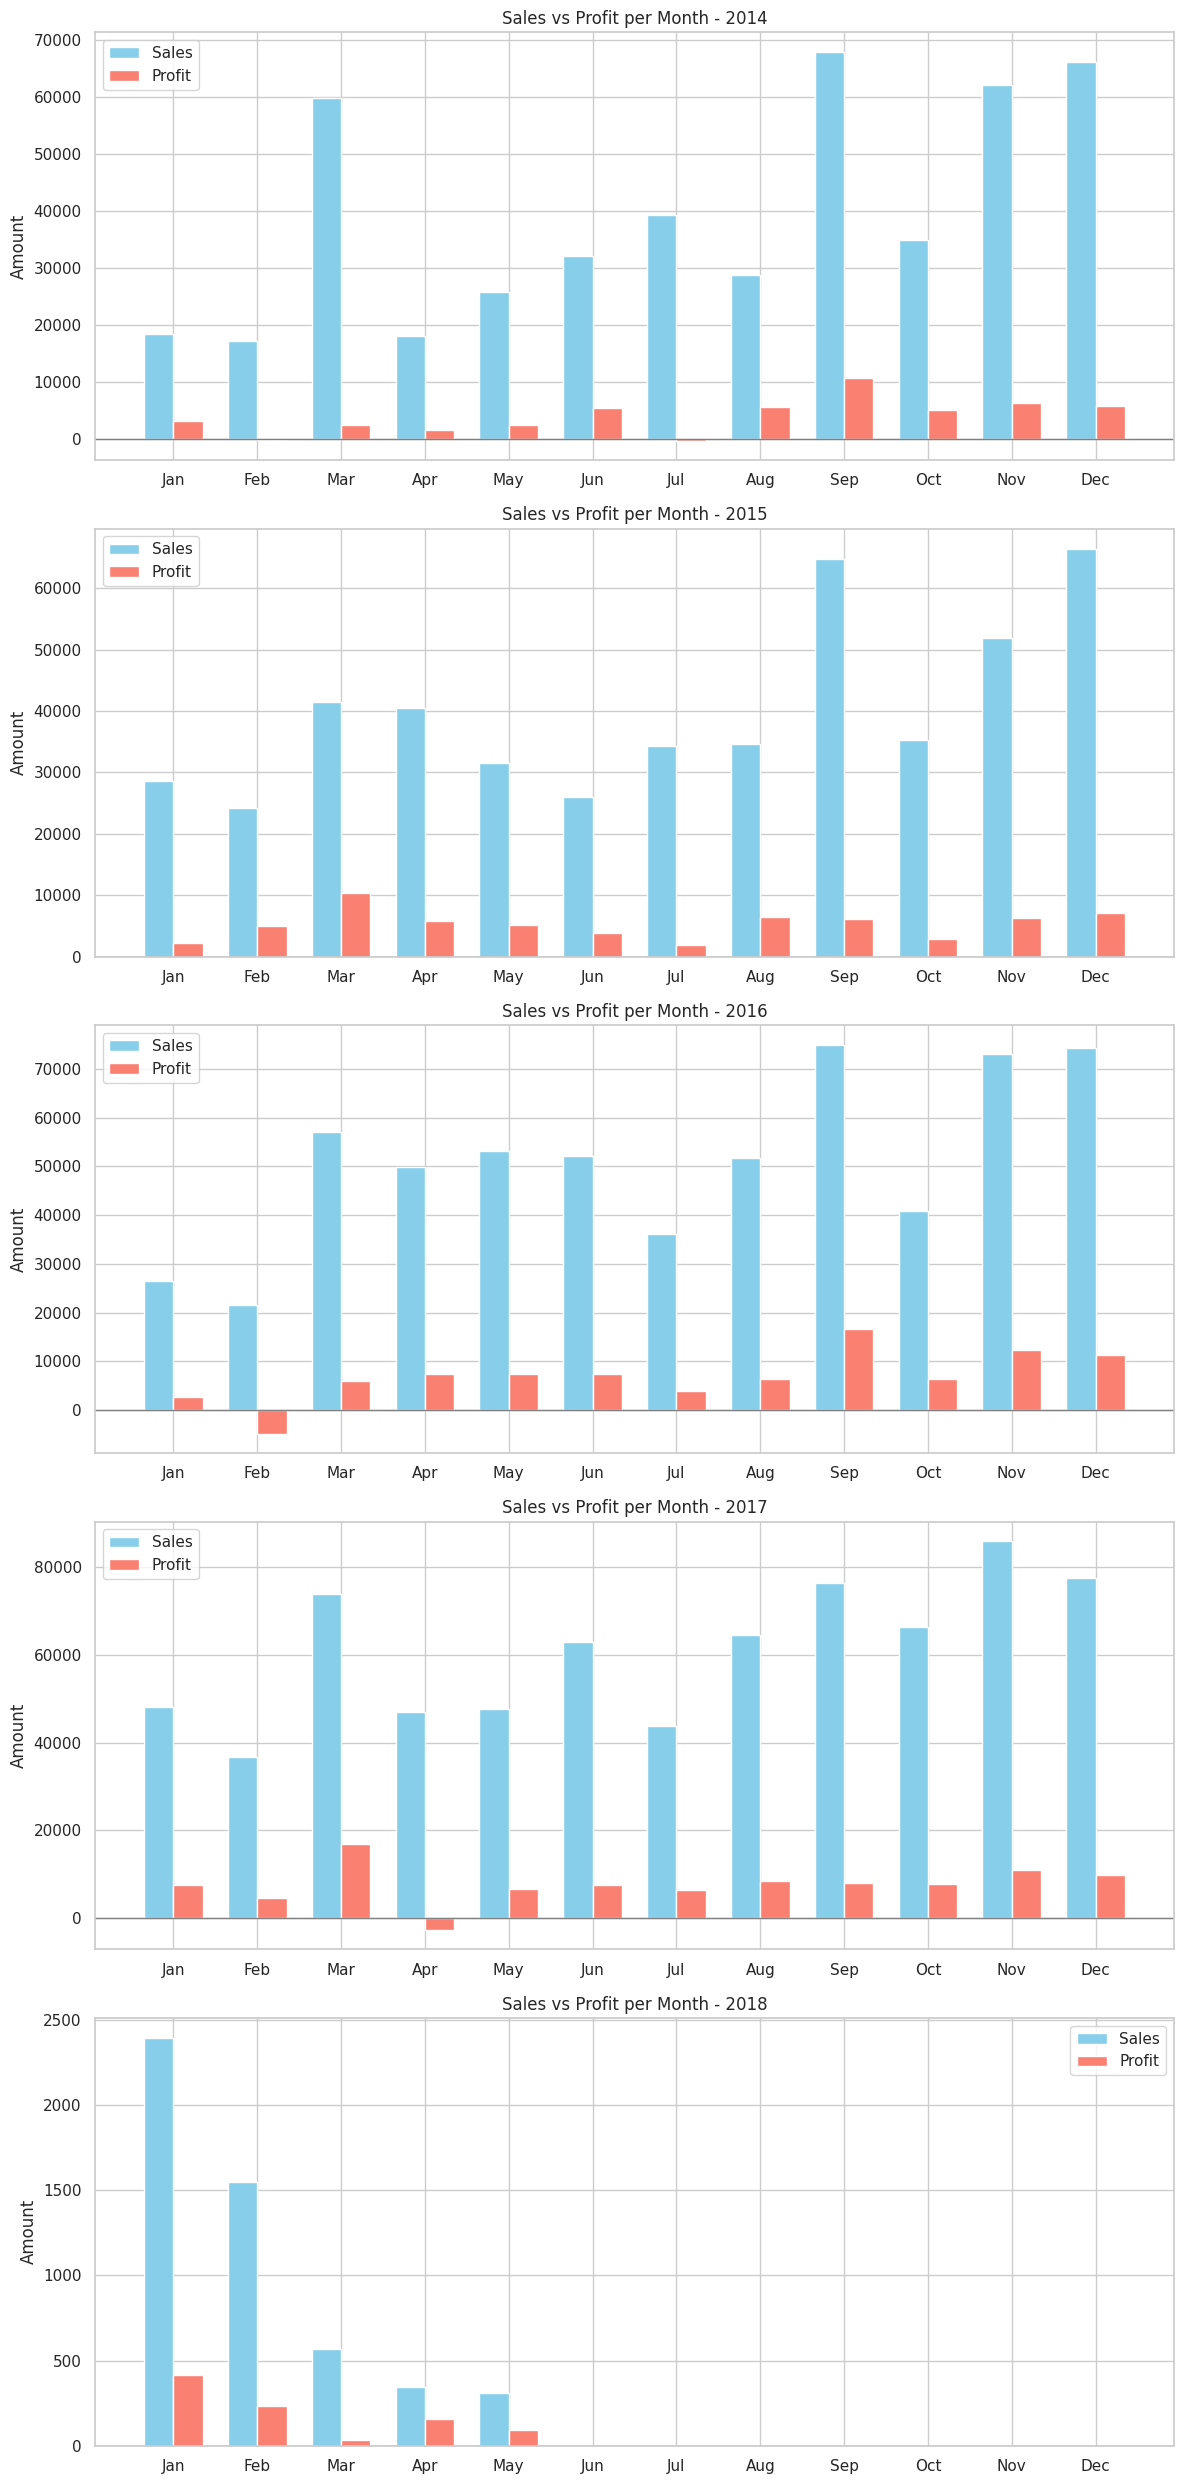

In [30]:
# 1. a). Bar Chart for Sales Vs Profit
# Merge sales and profit into one DataFrame
merged_data = pd.merge(monthly_data_sales, monthly_data_profit, on=['Year', 'Month'])

# Get sorted list of years
years = sorted(merged_data['Year'].unique())
n_years = len(years)

# Create subplots: one row per year
fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(12, 5 * n_years), sharex=True)

# Ensure axes is iterable
if n_years == 1:
    axes = [axes]

# Plot Sales and Profit per month for each year
for i, year in enumerate(years):
    data = merged_data[merged_data['Year'] == year].copy()

    # Ensure all 12 months are present, even if data is missing
    data = data.set_index('Month').reindex(range(1, 13), fill_value=0).reset_index()

    sales = data['Sales']
    profit = data['Profit']
    months = data['Month']

    x = np.arange(1, 13)  # 12 months
    width = 0.35  # bar width

    # Plot bars
    axes[i].bar(x - width/2, sales, width, label='Sales', color='skyblue')
    axes[i].bar(x + width/2, profit, width, label='Profit', color='salmon')

    # Add horizontal zero line
    axes[i].axhline(0, color='gray', linewidth=1)

    # Ensure y-axis includes negative values
    axes[i].autoscale(enable=True, axis='y', tight=False)

    # Labels and formatting
    axes[i].set_title(f'Sales vs Profit per Month - {year}')
    axes[i].set_ylabel('Amount')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].legend()
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

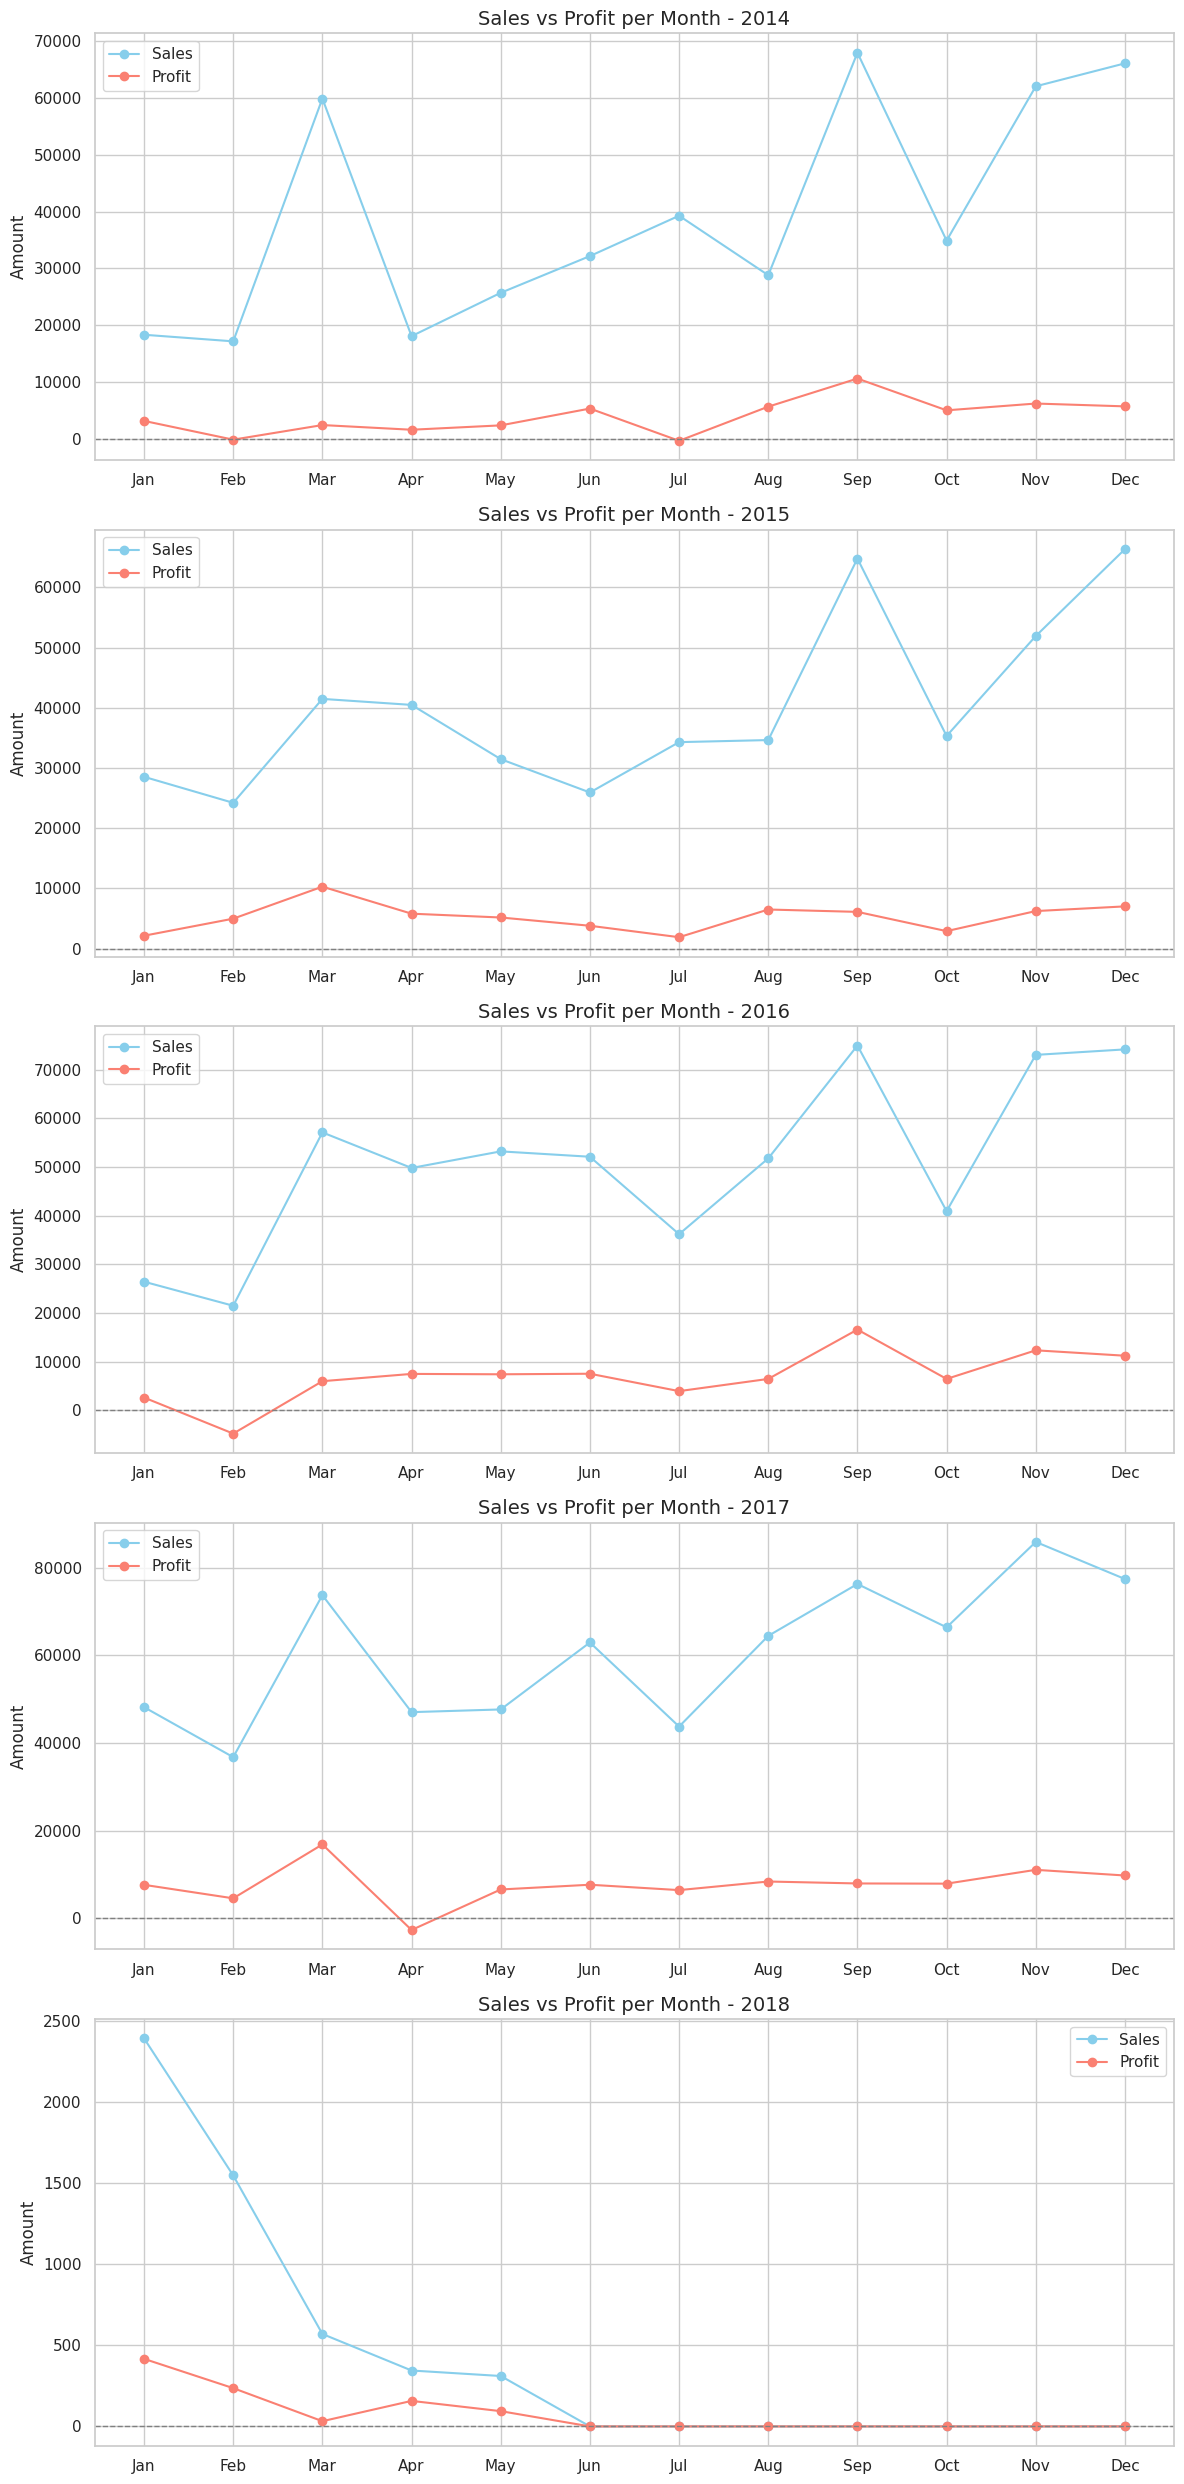

In [31]:
# b). Line Chart for Sales Vs Profit
# Merge sales and profit into one DataFrame
merged_data = pd.merge(monthly_data_sales, monthly_data_profit, on=['Year', 'Month'])

# Get sorted list of years
years = sorted(merged_data['Year'].unique())
n_years = len(years)

# Create subplots: one row per year
fig, axes = plt.subplots(nrows=n_years, ncols=1, figsize=(12, 5 * n_years), sharex=True)

# Ensure axes is iterable
if n_years == 1:
    axes = [axes]

# Plot Sales and Profit per month for each year using line plots
for i, year in enumerate(years):
    data = merged_data[merged_data['Year'] == year].copy()

    # Ensure all 12 months are present
    data = data.set_index('Month').reindex(range(1, 13), fill_value=0).reset_index()

    months = data['Month']
    sales = data['Sales']
    profit = data['Profit']

    # Plot lines
    axes[i].plot(months, sales, label='Sales', color='skyblue', marker='o')
    axes[i].plot(months, profit, label='Profit', color='salmon', marker='o')

    # Horizontal line at y=0
    axes[i].axhline(0, color='gray', linewidth=1, linestyle='--')

    # Labels and formatting
    axes[i].set_title(f'Sales vs Profit per Month - {year}', fontsize=14)
    axes[i].set_ylabel('Amount')
    axes[i].set_xticks(months)
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].legend()
    axes[i].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

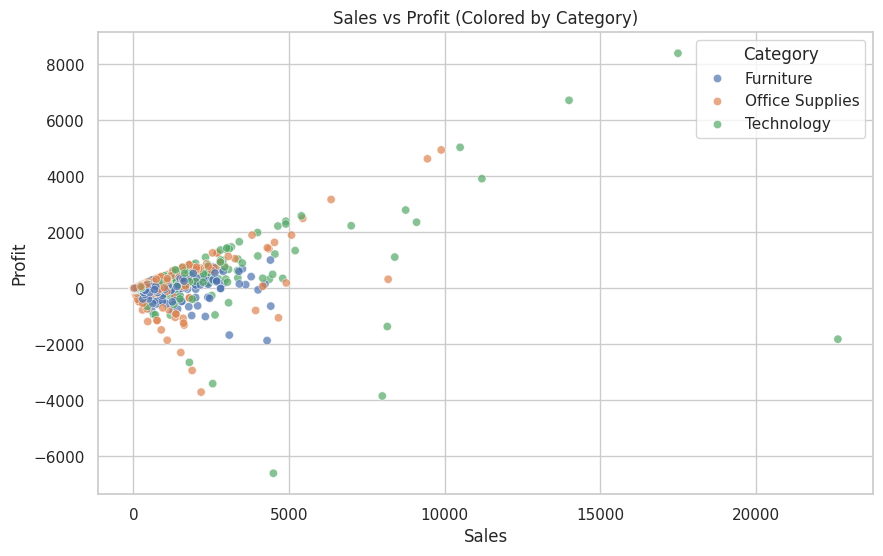

In [32]:
# c). Scatter Chart for Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title('Sales vs Profit (Colored by Category)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

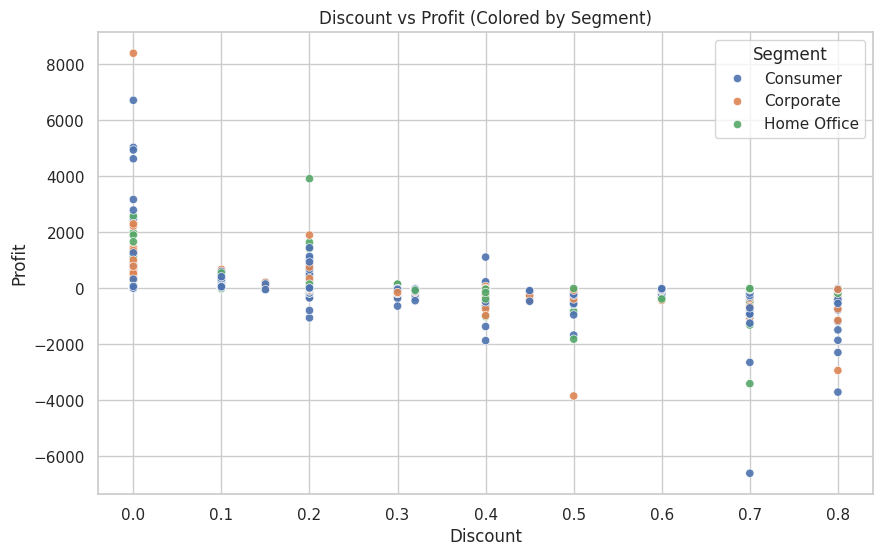

In [33]:
# 2. Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Segment', alpha=0.9)
plt.title('Discount vs Profit (Colored by Segment)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

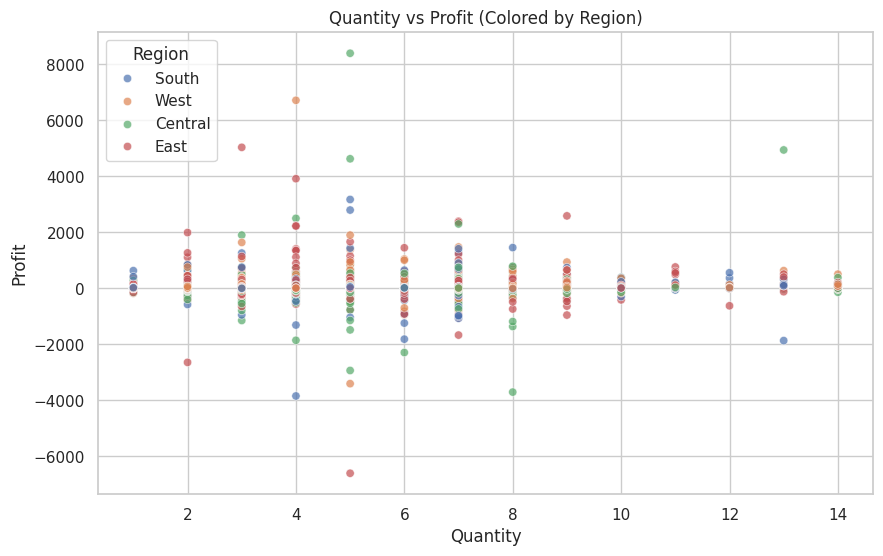

In [34]:
# 3. Quantity vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Profit', data=df, hue='Region', alpha=0.7)
plt.title('Quantity vs Profit (Colored by Region)')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

### **Bivariate Analysis**
2nd Category - Categorical vs Numerical

- Category vs Sales / Profit
- Sub-Category vs Sales / Profit
- Region, Segment, and Ship Mode vs Profit
- State vs Profit

/tmp/ipython-input-35-2342899621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, palette='pastel')


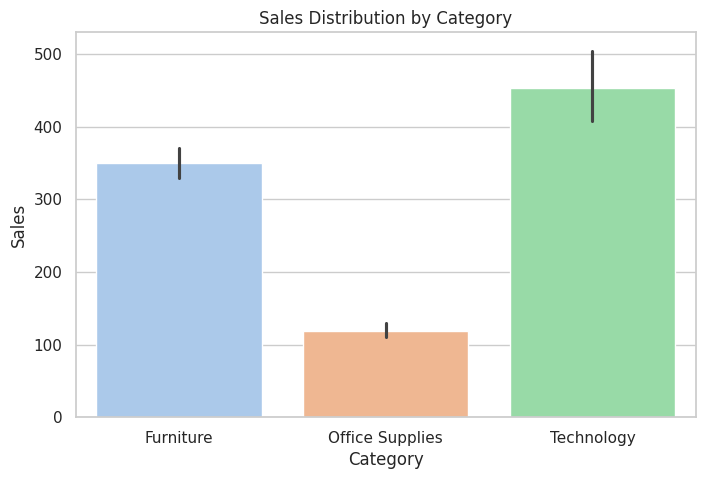

In [35]:
# 1. a). Category vs Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=df, palette='pastel')
plt.title('Sales Distribution by Category')
plt.show()

/tmp/ipython-input-36-508143606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, palette='pastel')


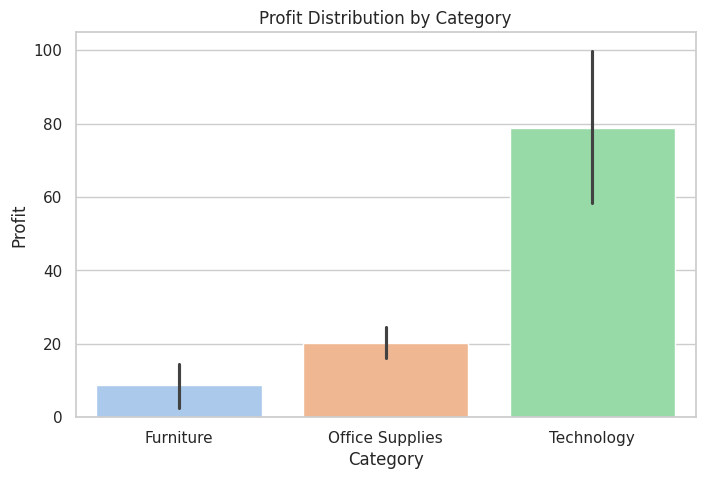

In [36]:
# 1. b). Category vs Profit
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Profit', data=df, palette='pastel')
plt.title('Profit Distribution by Category')
plt.show()

/tmp/ipython-input-37-220025276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set2')


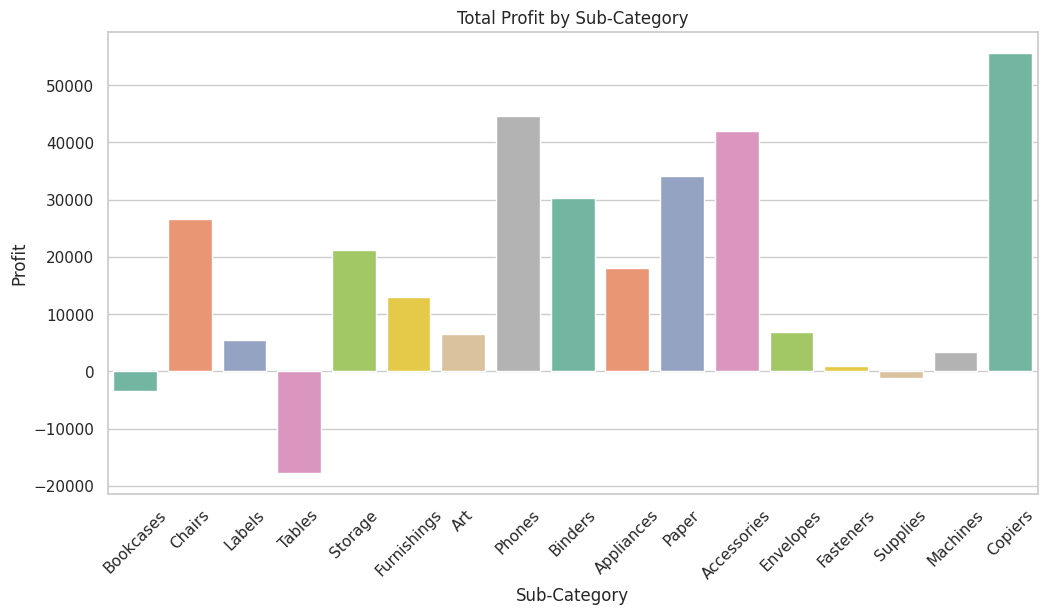

In [37]:
# 2. a). Sub-Category vs Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set2')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-38-1113082303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set2')


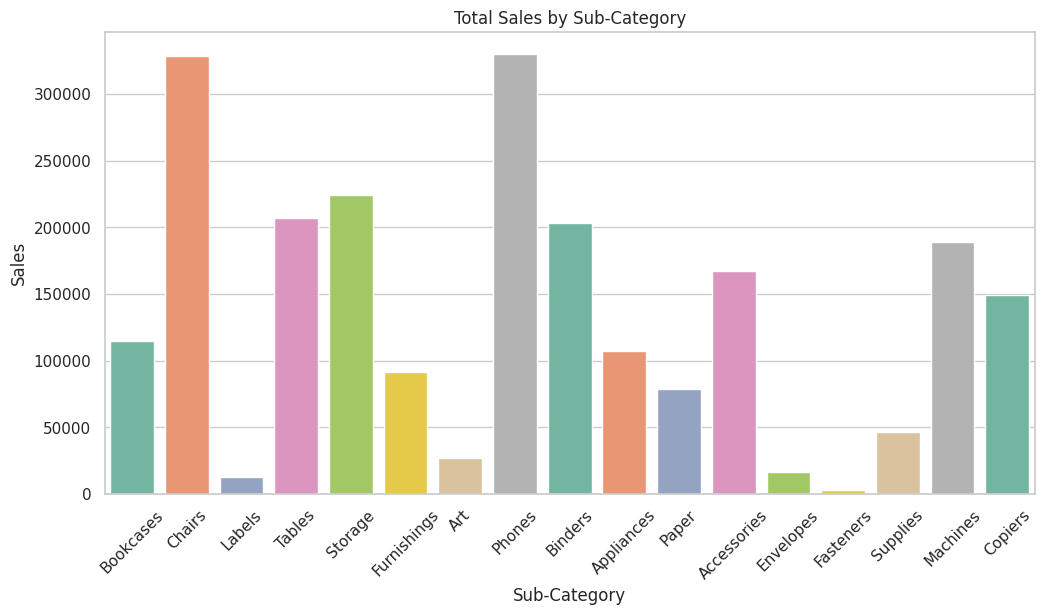

In [38]:
# 2. a). Sub-Category vs Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set2')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-39-3208955164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')


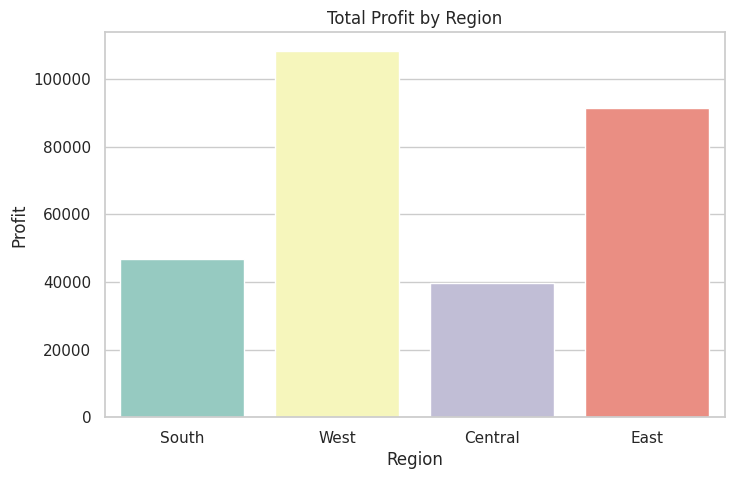

In [39]:
# 3. a). Region vs Profit
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')
plt.title('Total Profit by Region')
plt.show()

/tmp/ipython-input-40-2901451901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')


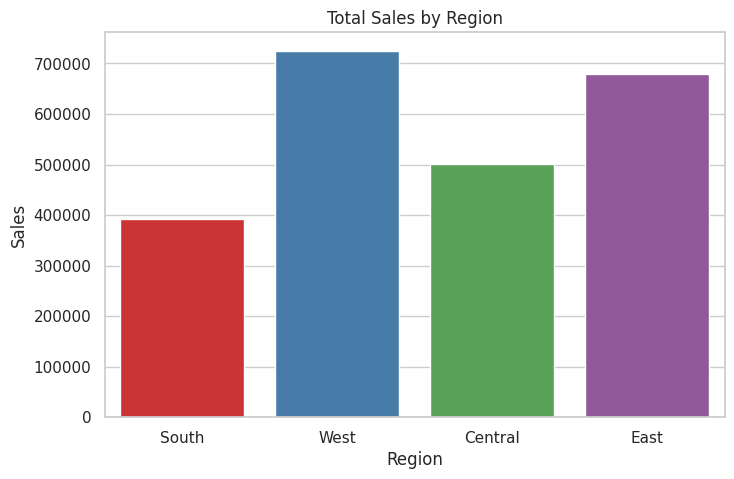

In [40]:
# 3. b). Region vs Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')
plt.title('Total Sales by Region')
plt.show()

/tmp/ipython-input-41-3471556098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')


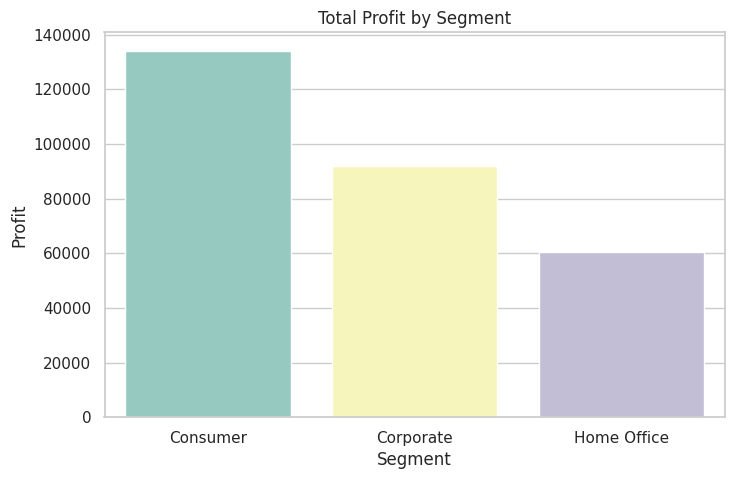

In [41]:
# 4. a). Segment vs Profit
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')
plt.title('Total Profit by Segment')
plt.show()

/tmp/ipython-input-42-1897473545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')


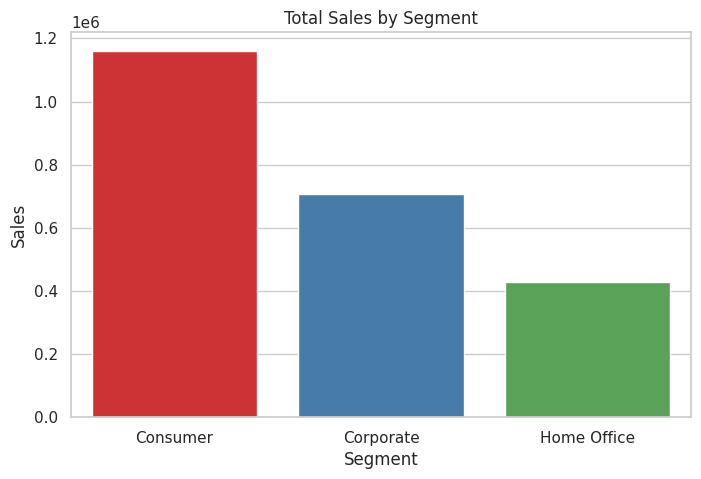

In [42]:
# 4. b). Segment vs Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')
plt.title('Total Sales by Segment')
plt.show()

/tmp/ipython-input-43-2786049573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')


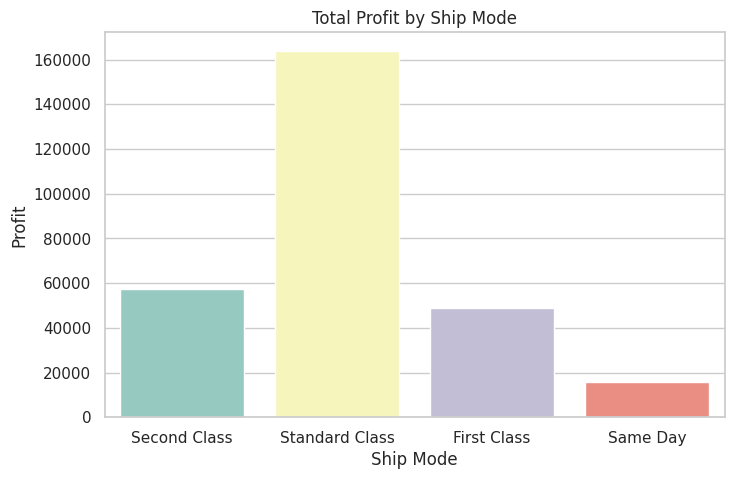

In [43]:
# 5. a). Ship Mode vs Profit
plt.figure(figsize=(8, 5))
sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, errorbar=None, palette='Set3')
plt.title('Total Profit by Ship Mode')
plt.show()

/tmp/ipython-input-44-29188975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')


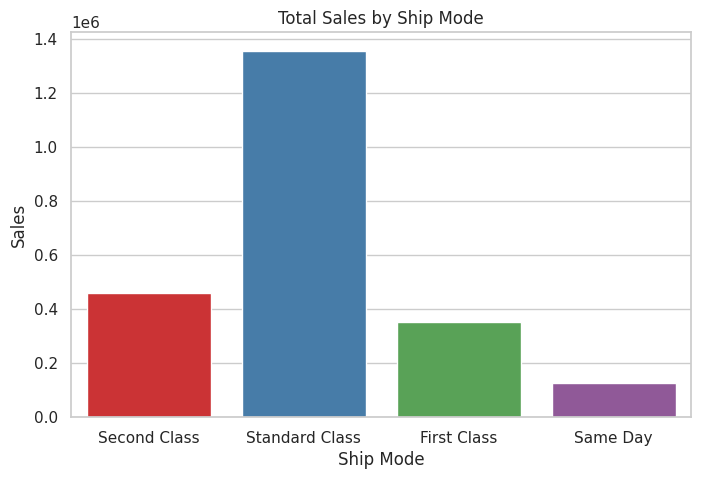

In [44]:
# 5. b). Ship Mode vs Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, errorbar=None, palette='Set1')
plt.title('Total Sales by Ship Mode')
plt.show()

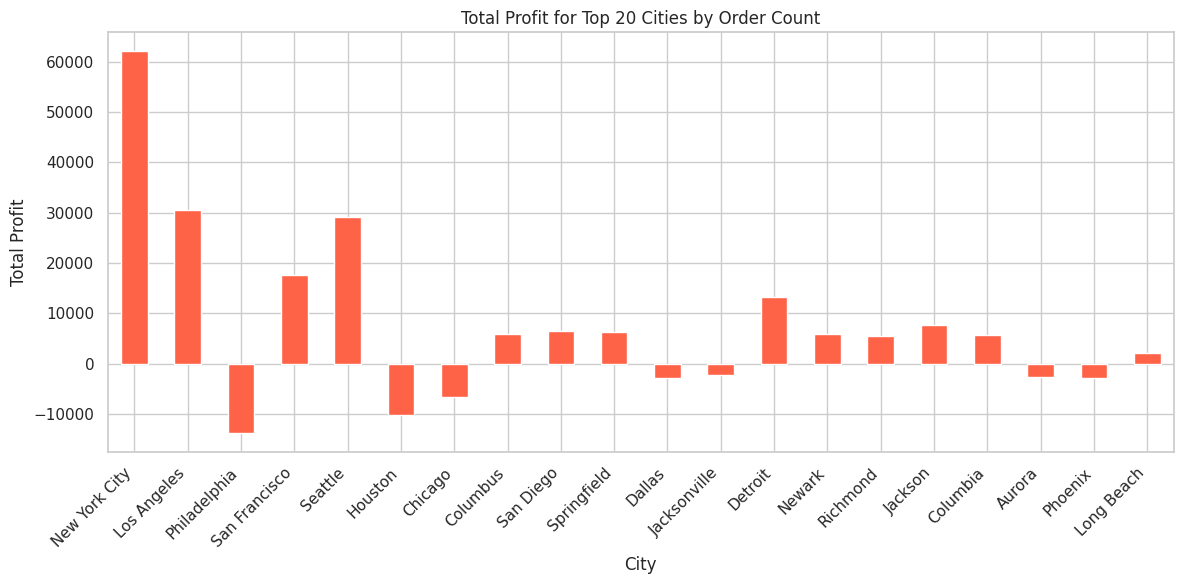

In [45]:
# 6. Total Profit for top 20 cities
top_cities = df['City'].value_counts().head(20).index

# Group and sum profit only for those top cities
profit_by_top_city = df[df['City'].isin(top_cities)].groupby('City')['Profit'].sum().loc[top_cities]

# Plot
plt.figure(figsize=(12, 6))
profit_by_top_city.plot(kind='bar', color='tomato')

# Labels and title
plt.title('Total Profit for Top 20 Cities by Order Count')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

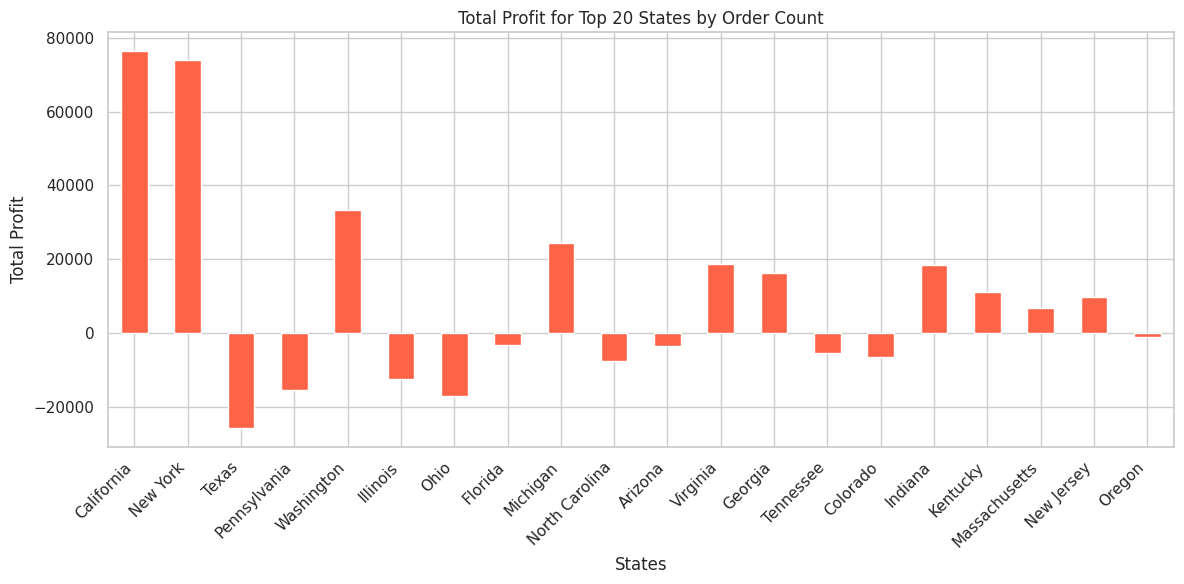

In [46]:
# 7. Total Profit for top 20 States
top_states = df['State'].value_counts().head(20).index

profit_by_top_state = df[df['State'].isin(top_states)].groupby('State')['Profit'].sum().loc[top_states]

# Plot
plt.figure(figsize=(12, 6))
profit_by_top_state.plot(kind='bar', color='tomato')

# Labels and title
plt.title('Total Profit for Top 20 States by Order Count')
plt.xlabel('States')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

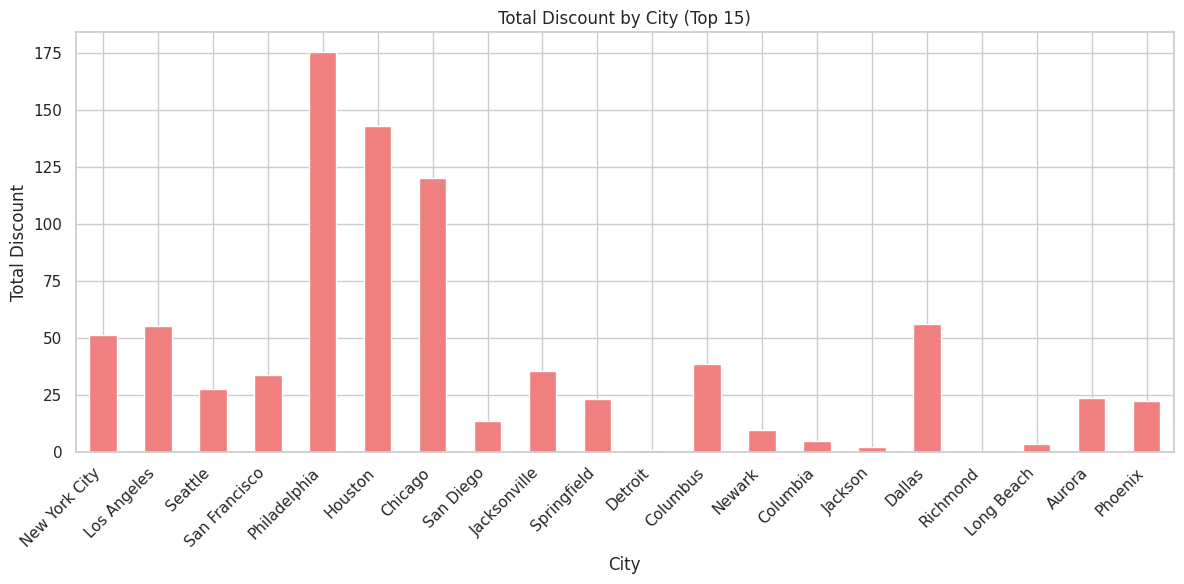

In [47]:
# Step 1: Get top 15 cities by count
top_20_cities = df['City'].value_counts().nlargest(20).index

# Step 2: Filter dataframe to include only top 15 cities
df_top20 = df[df['City'].isin(top_20_cities)]

# Step 3: Group by city and calculate total Discount and total Sales
city_summary = df_top20.groupby('City')[['Discount', 'Sales']].sum().sort_values(by='Sales', ascending=False)

# Step 4: Plot total Discount
plt.figure(figsize=(12, 6))
city_summary['Discount'].plot(kind='bar', color='lightcoral')
plt.title('Total Discount by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Discount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
# Grouped counts of Ship Mode by Segment
ship_by_segment = pd.crosstab(df['Segment'], df['Ship Mode'])
print(ship_by_segment)

Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             769       317          1020            3085
Corporate            485       114           609            1812
Home Office          284       112           316            1071


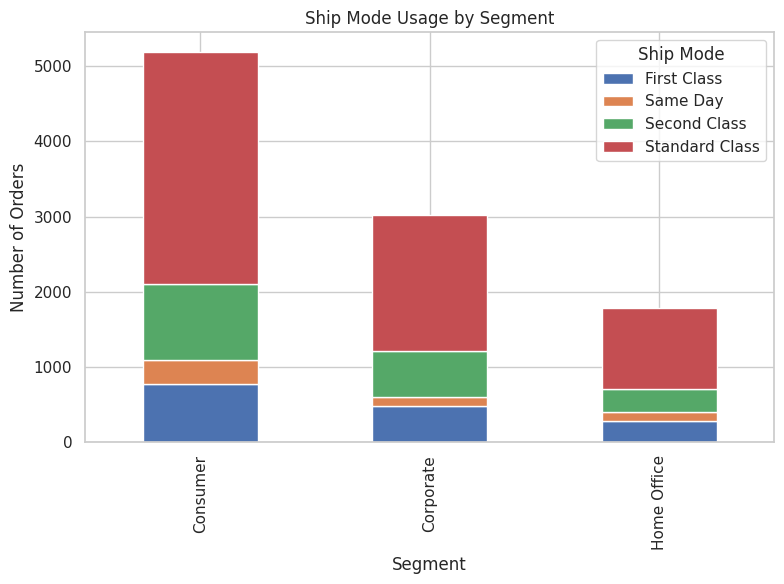

In [49]:
ship_by_segment.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Ship Mode Usage by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

### **Correlation Matrix**
Between numerical variables: Sales, Profit, Discount, Quantity

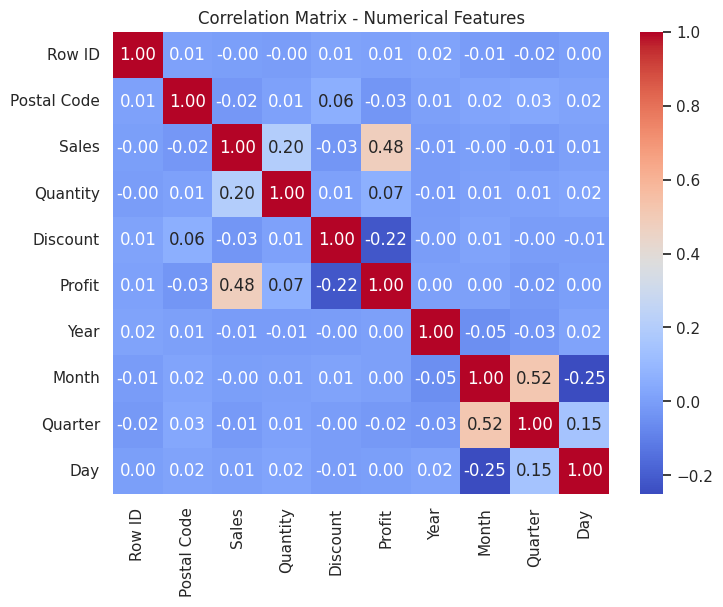

In [50]:
# Correlation Matrix (Numerical Columns)
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Numerical Features')
plt.show()

### **Data Cleaning & Preprocessing**

In [51]:
# Convert categorical columns explicitly
cat_cols = ['Category', 'Sub-Category', 'Segment', 'Ship Mode', 'Region', 'State', 'City']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Ensure correct types
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                   category
State                  category
Postal Code               int64
Region                 category
Product ID               object
Category               category
Sub-Category           category
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
Quarter                   int32
Day                       int32
Weekday                  object
dtype: object


In [52]:
df = df[df['Year'] != 2018]

In [53]:
# Remove extreme outliers in Profit or Sales (e.g., using IQR method)
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

In [54]:
# For Cities
top_20_cities = df['City'].value_counts().nlargest(20).index
df['City'] = df['City'].apply(lambda x: x if x in top_20_cities else 'Others')

# For States
top_20_states = df['State'].value_counts().nlargest(20).index
df['State'] = df['State'].apply(lambda x: x if x in top_20_states else 'Others')

In [55]:
cols_to_drop = ['Country', 'Customer ID', 'Customer Name', 'Row ID','Product ID','Order ID']
df = df.drop(columns=cols_to_drop)

In [56]:
# Calculate Delivery Time as difference in days
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [57]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [58]:
from sklearn.preprocessing import StandardScaler

# Features to scale
scale_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

### **Model Pipeline: Feature Engineering + Training**

In [59]:
# Select relevant features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Sub-Category',
            'Segment', 'Region', 'Ship Mode']
target = 'Profit'

# Create the input dataframe
X = df[features]
y = df[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [60]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [61]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())])

In [62]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [65]:
# defining all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet Regression": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

In [66]:
# evaluation function

results = []

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    })

# Loop through all models
for name, model in models.items():
    evaluate_model(name, model)

# Convert to DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 6463, number of used features: 28
[LightGBM] [Info] Start training from score 0.003052


,Model,R2 Score,MAE,RMSE
0,Random Forest,0.785066,0.209112,0.453026
1,LightGBM,0.779960,0.229312,0.458375
2,XGBoost,0.774745,0.222091,0.463776
3,Gradient Boosting,0.742510,0.277059,0.495851
4,SVR,0.729169,0.268569,0.508534
5,Decision Tree,0.634170,0.248022,0.591031
6,KNN Regressor,0.555197,0.428868,0.651710
7,Ridge Regression,0.430027,0.531914,0.737730
8,Linear Regression,0.429933,0.532131,0.737791
9,ElasticNet Regression,0.411539,0.530209,0.749600


/tmp/ipython-input-67-2502561604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")


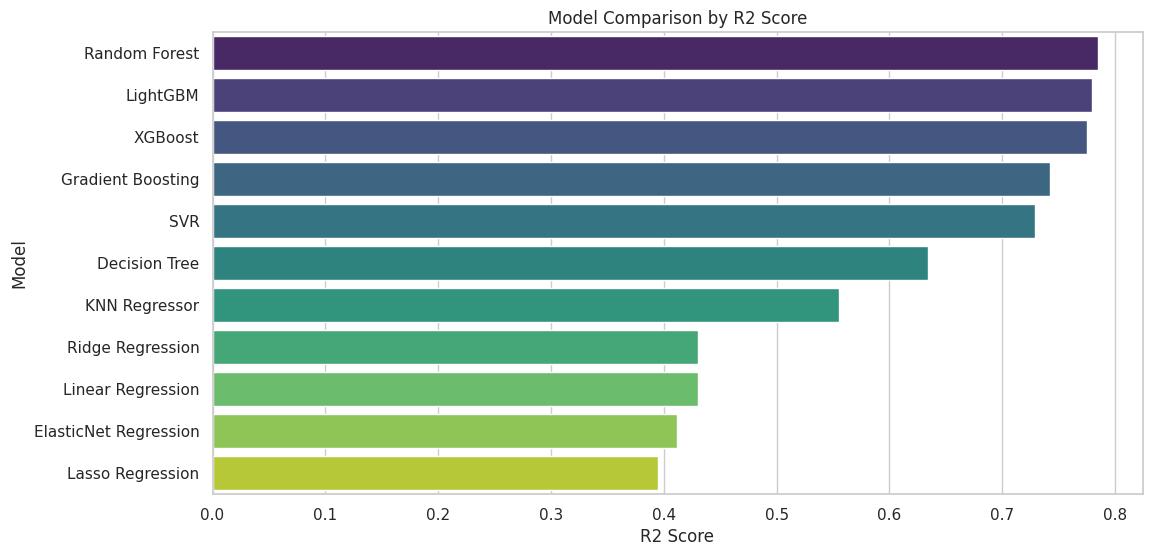

In [67]:
# plotting model comparison
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")
plt.title("Model Comparison by R2 Score")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

### **Tuning With GridSearchCV**

**1️. Random Forest Regressor**

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF R2:", grid_rf.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best RF Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF R2: 0.7247082834715638


**2️.  LightGBM Regressor**

In [69]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)

param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'num_leaves': [31, 40, 50]
}

grid_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_lgb.fit(X_train, y_train)

print("Best LGBM Params:", grid_lgb.best_params_)
print("Best LGBM R2:", grid_lgb.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 6463, number of used features: 28
[LightGBM] [Info] Start training from score 0.003052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

**3️.  XGBoost Regressor**

In [70]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, verbosity=0)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB R2:", grid_xgb.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGB Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best XGB R2: 0.726596191426836


**4. Gradient Boosting Regressor**

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_gbr.fit(X_train, y_train)

print("Best GBR Params:", grid_gbr.best_params_)
print("Best GBR R2:", grid_gbr.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best GBR Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best GBR R2: 0.7242119152942914


**5. Support Vector Regression**

In [72]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear']
}

grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train, y_train)

print("Best SVR Params:", grid_svr.best_params_)
print("Best SVR R2:", grid_svr.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best SVR Params: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best SVR R2: 0.681787418842096


In [73]:
# collect all best estimators
best_rf = grid_rf.best_estimator_
best_lgb = grid_lgb.best_estimator_
best_xgb = grid_xgb.best_estimator_
best_gbr = grid_gbr.best_estimator_
best_svr = grid_svr.best_estimator_

In [74]:
# Evaluate on test set

models = {
    'Random forest' : best_rf,
    'LGBM': best_lgb,
    'XGBoost': best_xgb,
    'Gradient Boosting': best_gbr,
    'SVR': best_svr
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))


Random forest Results:
R² Score: 0.7872826116782206
RMSE: 0.45068388825325695
MAE: 0.22071337374356628

LGBM Results:
R² Score: 0.7793712288768553
RMSE: 0.4589882939461092
MAE: 0.22770978044290216

XGBoost Results:
R² Score: 0.7787968034081013
RMSE: 0.45958541275323395
MAE: 0.23239073776854985

Gradient Boosting Results:
R² Score: 0.7920238448804977
RMSE: 0.44563296432419214
MAE: 0.23137713257996234

SVR Results:
R² Score: 0.729169031928618
RMSE: 0.5085336519894526
MAE: 0.26856922768707625


In [75]:
# Evaluate the model
best_model = grid_gbr.best_estimator_
y_pred = best_model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_gbr.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error: 0.19858873889236672
R^2 Score: 0.7920238448804977


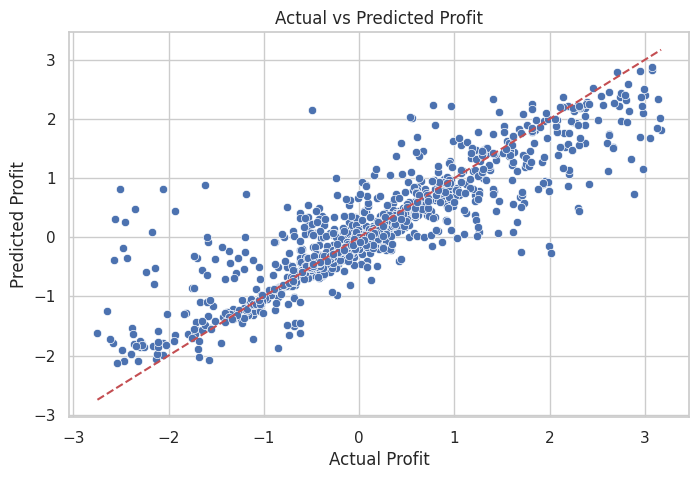

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # identity line
plt.show()

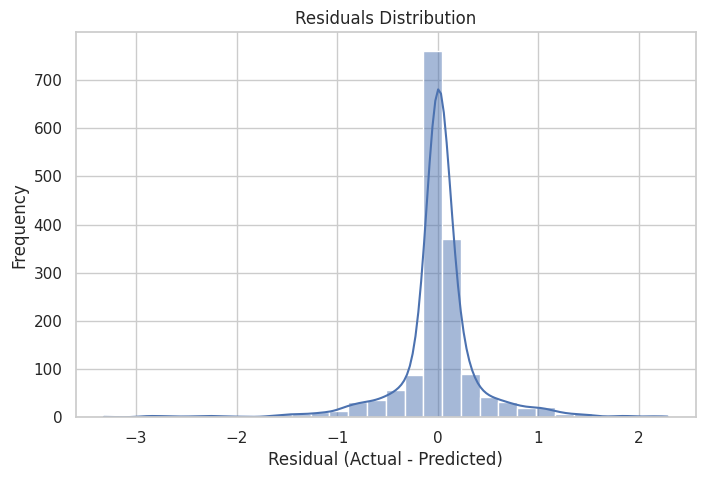

In [78]:
# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

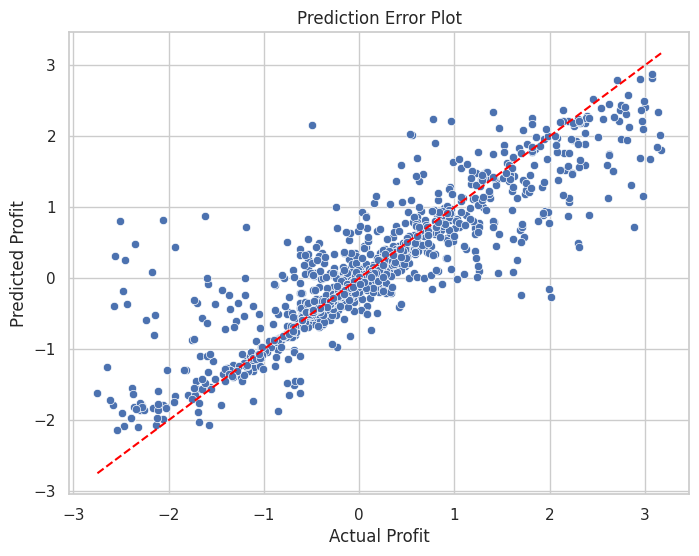

In [79]:
# Prediction Error Plot (Regression Diagnostic)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Prediction Error Plot")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.show()

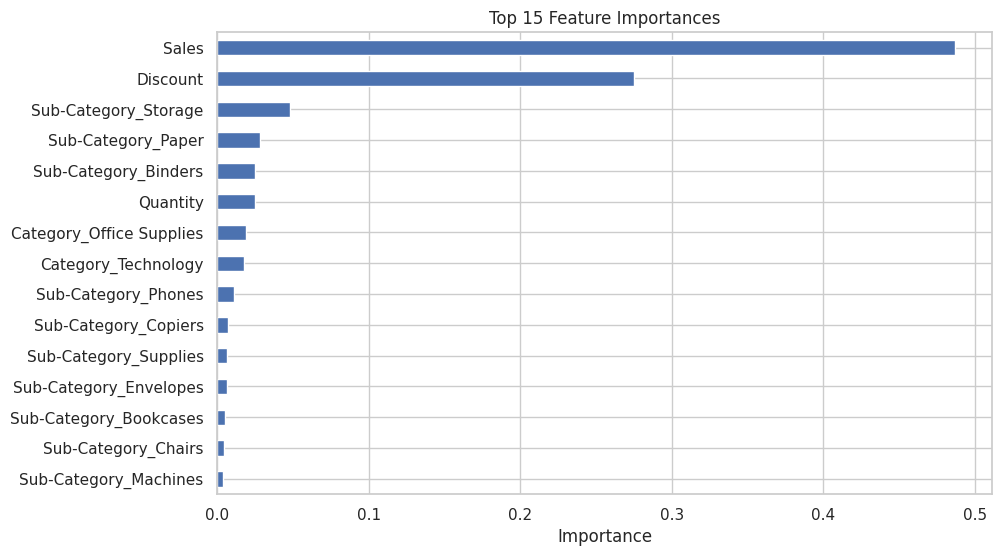

In [80]:
# Feature Importance
importances = best_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

In [81]:
import pickle
import joblib

# Save the trained model
with open('profit_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the columns used for prediction
joblib.dump(X_train.columns, 'profit_feature_columns.pkl')

['profit_feature_columns.pkl']

In [ ]:
# app.py code
import streamlit as st
import pandas as pd
import pickle
import joblib

# Load model and features
try:
    model = pickle.load(open('profit_model.pkl', 'rb'))
    feature_columns = joblib.load(open('profit_feature_columns.pkl', 'rb'))
except FileNotFoundError:
    st.error("Required model files not found. Please make sure 'profit_model.pkl' and 'profit_feature_columns.pkl' exist.")
    st.stop()

st.set_page_config(page_title="Superstore Profit Predictor", layout="centered")
st.title("💰 Superstore Profit Predictor")
st.caption("Enter order details to predict expected **Profit** and **Profit %** of Sales.")

# User Inputs
with st.form("prediction_form"):
    col1, col2 = st.columns(2)
    with col1:
        ship_mode = st.selectbox("Ship Mode", ['Standard Class', 'Second Class', 'First Class', 'Same Day'])
        segment = st.selectbox("Segment", ['Consumer', 'Corporate', 'Home Office'])
        city = st.text_input("City", "Springfield")
        postal_code = st.number_input("Postal Code", value=62704)
        category = st.selectbox("Category", ['Furniture', 'Office Supplies', 'Technology'])
        sub_category = st.selectbox("Sub-Category", ['Bookcases', 'Chairs', 'Phones', 'Accessories', 'Binders', 'Tables'])

    with col2:
        state = st.text_input("State", "Illinois")
        region = st.selectbox("Region", ['Central', 'West', 'East', 'South'])
        sales = st.number_input("Sales", min_value=0.0, value=120.0)
        quantity = st.number_input("Quantity", min_value=1, value=1)
        year = st.number_input("Year", min_value=2020, value=2024)
        month = st.number_input("Month", min_value=1, max_value=12, value=6)
        delivery_time = st.number_input("Delivery Time (days)", min_value=1, max_value=15, value=3)

    submitted = st.form_submit_button("🔮 Predict Profit")

# Prediction
if submitted:
    input_data = pd.DataFrame([{
        'Ship Mode': ship_mode,
        'Segment': segment,
        'City': city,
        'State': state,
        'Postal Code': postal_code,
        'Region': region,
        'Category': category,
        'Sub-Category': sub_category,
        'Sales': sales,
        'Quantity': quantity,
        'Year': year,
        'Month': month,
        'Delivery Time': delivery_time
    }])

    # One-hot encode like training
    categorical_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
    input_encoded = pd.get_dummies(input_data, columns=categorical_cols)
    input_encoded = input_encoded.reindex(columns=feature_columns, fill_value=0)

    # Predict
    predicted_profit = model.predict(input_encoded)[0]
    profit_percent = (predicted_profit / sales) * 100 if sales != 0 else 0

    # Show Results
    st.success(f"💸 Predicted Profit: ₹{round(predicted_profit, 2)}")
    st.info(f"📈 Profit Percentage: {round(profit_percent, 2)}% of Sales")

In [ ]:
# If any issues with the scikit learn version then - retrain_model.py
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import joblib
import pickle

# Sample training data (use your actual data if you have it)
data = pd.DataFrame({
    'Ship Mode': ['Standard Class', 'Second Class', 'First Class', 'Same Day'],
    'Segment': ['Consumer', 'Corporate', 'Home Office', 'Consumer'],
    'City': ['Springfield', 'Austin', 'Dallas', 'Houston'],
    'State': ['Illinois', 'Texas', 'Texas', 'Texas'],
    'Postal Code': [62704, 73301, 75001, 77001],
    'Region': ['Central', 'West', 'East', 'South'],
    'Category': ['Furniture', 'Technology', 'Office Supplies', 'Furniture'],
    'Sub-Category': ['Bookcases', 'Phones', 'Binders', 'Chairs'],
    'Sales': [120, 300, 150, 200],
    'Quantity': [1, 2, 3, 4],
    'Year': [2024, 2024, 2024, 2024],
    'Month': [6, 7, 8, 9],
    'Delivery Time': [3, 4, 2, 5],
    'Profit': [50, 100, 60, 90]
})

# Define input and target
X = data.drop(columns='Profit')
y = data['Profit']

# Encode categoricals
categorical_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
X_encoded = pd.get_dummies(X, columns=categorical_cols)
feature_columns = X_encoded.columns

# Train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)
model = GradientBoostingRegressor().fit(X_train, y_train)

# Save model and feature columns
with open('profit_model.pkl', 'wb') as f:
    pickle.dump(model, f)

joblib.dump(feature_columns, 'profit_feature_columns.pkl')

print("✅ Model and columns saved with your current scikit-learn version.")

### **📊 Sales Performance Insights**
**Insight:**  
- Sales volumes peak in Q4 (especially November and December), aligning with year-end consumer shopping trends.
- Despite high sales in some months, profit margins fluctuate due to discounts and shipping costs.

**Recommendation:**
- Increase inventory and marketing efforts during Q4 to capitalize on demand.
- Track and limit excessive discounts during peak months to protect margins.


### **🛍️ Product Category Performance**
**Insight:**
- Technology category contributes the highest to profit, while Furniture has comparatively lower profit margins.
- Sub-categories like Chairs and Tables have high sales but often yield negative profits due to discounts and high shipping costs.

**Recommendation:**
- Promote Technology and high-margin sub-categories through cross-selling.
- Reassess pricing and discounting strategy for underperforming sub-categories.
- Consider bundling low-margin items with high-margin ones.

### **🗺️ Regional and Segment Insights**
**Insight:**
- The West region leads in profitability, while South lags despite decent sales volume.
- The Consumer segment dominates order volume but doesn't yield the highest profit.

**Recommendation:**
- Strengthen marketing and logistics in the West to maintain leadership.
- Explore reasons behind low profitability in the South (e.g., shipping costs, discounting).
- Upsell premium products to the Consumer segment or focus on Corporate clients for higher profit margins.

### **💸 Profitability Drivers**
**Insight:**
- High discounts (especially >30%) have a strong negative impact on profit.
- There is no direct linear relationship between high sales and high profit – discounts and shipping cost are major influencers.

**Recommendation:**
- Cap discounts at an optimal threshold where sales aren't sacrificed, but profit is retained.
- Analyze the return on investment (ROI) for discount campaigns more rigorously.
- Identify and flag orders with high sales but negative profits for business review.

### **📦 Shipping & Order Handling**
**Insight:**
- Same Day and First Class shipping have the highest shipping costs but are frequently used even for low-value orders.
- States with longer average shipping delays tend to see lower repeat purchases.

**Recommendation:**
- Restrict premium shipping options to high-value orders only.
- Optimize logistics partnerships in underperforming states to reduce delivery time and cost.
- Incentivize customers to choose cost-effective shipping options (e.g., via loyalty points).


### **🧠 Predictive Modeling Insights**
**Insight:** The XGBoost model identifies Discount, Quantity, and Category as the top predictors for profit.

**Model Performance:** Reasonable R² and low RMSE show the model can help in forecasting profit with good accuracy.

**Recommendation:**
- Deploy the predictive model in the sales pipeline to forecast profit margins on live orders.
- Use model insights to set real-time discount thresholds per order.
- Integrate with dashboards (Power BI, Streamlit) for ongoing decision-making support.




## ***📌 Overall Strategic Recommendations***
**Dynamic Discounting Engine:** Implement an AI-powered discounting tool that predicts the minimum discount needed to close a sale profitably.

**Profit-Centric KPIs:** Shift from sales-driven KPIs to profit-per-order as a central metric.

**Geo-Specific Marketing:** Customize campaigns by region and customer segment based on their profitability patterns.

**Product Rationalization:** Consider removing or redesigning products/sub-categories that consistently lead to negative margins.